In [53]:
%pip install -r requirements.txt

Processing c:\b\abs_1c1a_vjay2\croot\aiobotocore_1682537737724\work (from -r requirements.txt (line 2))
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\b\\abs_1c1a_vjay2\\croot\\aiobotocore_1682537737724\\work'



In [54]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn
# %pip install xgboost
# %pip install tensorflow
# %pip install keras
# %pip install torch
# %pip install optuna
# %pip install ipython
# %pip install imbalanced-learn
# %pip install cuda-python
# %pip install cupy-cuda12x

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, fbeta_score, roc_auc_score, make_scorer, roc_curve, recall_score, precision_score, matthews_corrcoef
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
import optuna
import joblib
import gc
import torch
import logging
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
df = pd.read_csv('./caso_final_small_20k_con_mes.csv')

In [57]:
df.head()

MES    MB_TOTALES  FACTURACION_TOTAL_IMPUESTOS  FACTURACION_CUOTA  \
0  201901    232.121597                    10.186000           0.000000   
1  201911  18280.292969                    32.005001          26.450001   
2  201906   2141.692810                    37.442001          31.400000   
3  202006   3181.986496                    20.001000          16.530000   
4  202001  25626.083984                    37.005001          26.450001   

   SEGUNDOS_LLAMADA_RED_PROPIA  SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA  \
0                       4523.0                                1183.0   
1                      13288.0                                9194.0   
2                         13.0                                  13.0   
3                          0.0                                   0.0   
4                      72783.0                               27609.0   

   SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA  MB_MENSUALES  EDAD  \
0                                  28.0    232.121597  39.0   
1                                  49.0  18280.292969  25.0   
2                                   0.0   2141.692810  47.0   
3                                   0.0   3181.986496  43.0   
4                                 151.0  25626.083984  40.0   

   NUM_LLAMADAS_RED_PROPIA  ...  MINUTOS_LLAMADAS_MENSUALES  NUM_DIAS_BUNDLE  \
0                     54.0  ...                   21.683399                0   
1                    152.0  ...                  166.050007              435   
2                      4.0  ...                  108.850102                0   
3                      0.0  ...                   65.799899                0   
4                    329.0  ...                  519.683305                1   

   KPI_IMPUESTOS  NUM_DESACTIVACIONES  PORCENTAJE_SEGUNDOS_RED_PROPIA  \
0       1.767800                    0                           100.0   
1       5.555000                    0                           100.0   
2       2.042002                    0                           100.0   
3       3.471001                    0                           100.0   
4       5.555000                    0                           100.0   

   SERVICIOS_TOTALES_MARCA  SERVICIOS_TOTALES_POSPAGO  MINUTOS_LLAMADAS_MOVIL  \
0                        2                          1                     0.0   
1                        1                          2                     0.0   
2                        2                          2                     0.0   
3                        2                          3                     0.0   
4                        1                          1                     0.0   

   PENETRACION_FIJO_ZONA  TARGET  
0               0.264612       0  
1               0.380171       0  
2               0.156041       0  
3               0.228810       1  
4               0.210286       1  

[5 rows x 36 columns]

In [58]:
df.describe()

MES     MB_TOTALES  FACTURACION_TOTAL_IMPUESTOS  \
count   20000.000000   19741.000000                 19924.000000   
mean   201948.470400   12307.320625                    40.939452   
std        49.255692   20115.499610                    30.326117   
min    201901.000000       0.000000                    -0.002000   
25%    201905.000000    1929.673340                    24.999000   
50%    201911.000000    5931.522949                    33.004000   
75%    202005.000000   16013.454310                    50.124250   
max    202011.000000  853613.593750                  1246.438000   

       FACTURACION_CUOTA  SEGUNDOS_LLAMADA_RED_PROPIA  \
count       19924.000000                 19843.000000   
mean           25.179305                 19282.843471   
std            13.067181                 31773.406451   
min             0.000000                     0.000000   
25%            15.700000                  1777.000000   
50%            23.969999                  8011.000000   
75%            26.460000                 23009.500000   
max           133.890000                584239.000000   

       SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA  \
count                          19843.000000   
mean                           10334.947941   
std                            18971.928733   
min                                0.000000   
25%                              705.500000   
50%                             3631.000000   
75%                            11846.500000   
max                           422724.000000   

       SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA   MB_MENSUALES          EDAD  \
count                          19843.000000   19749.000000  19971.000000   
mean                              62.941239   12288.026161     43.990937   
std                               93.528782   20112.795794     14.125926   
min                                0.000000       0.000000     17.000000   
25%                               11.000000    1915.529785     33.000000   
50%                               36.000000    5898.413086     43.000000   
75%                               82.000000   15967.201660     54.000000   
max                             6220.000000  853613.593750     98.000000   

       NUM_LLAMADAS_RED_PROPIA  ...  MINUTOS_LLAMADAS_MENSUALES  \
count             19843.000000  ...                19749.000000   
mean                156.408456  ...                  361.817034   
std                 227.913588  ...                  543.391221   
min                   0.000000  ...                    0.000000   
25%                  29.000000  ...                   64.999998   
50%                  87.000000  ...                  178.966798   
75%                 199.000000  ...                  443.583287   
max               12497.000000  ...                12316.250395   

       NUM_DIAS_BUNDLE  KPI_IMPUESTOS  NUM_DESACTIVACIONES  \
count     20000.000000   19924.000000          20000.00000   
mean        148.792200       5.657482              0.00785   
std         476.199046       3.552509              0.10435   
min           0.000000      -1.190000              0.00000   
25%           0.000000       3.297000              0.00000   
50%           1.000000       5.034000              0.00000   
75%           2.000000       6.768002              0.00000   
max        4056.000000      93.483509              4.00000   

       PORCENTAJE_SEGUNDOS_RED_PROPIA  SERVICIOS_TOTALES_MARCA  \
count                    19737.000000             20000.000000   
mean                        99.975217                 1.432750   
std                          1.284268                 0.756972   
min                          0.000000                 1.000000   
25%                        100.000000                 1.000000   
50%                        100.000000                 1.000000   
75%                        100.000000                 2.000000   
max                        100.000000                 8.000000   

       SERVICIOS_TOTALE

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   MES                                   20000 non-null  int64  
 1   MB_TOTALES                            19741 non-null  float64
 2   FACTURACION_TOTAL_IMPUESTOS           19924 non-null  float64
 3   FACTURACION_CUOTA                     19924 non-null  float64
 4   SEGUNDOS_LLAMADA_RED_PROPIA           19843 non-null  float64
 5   SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA  19843 non-null  float64
 6   SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA  19843 non-null  float64
 7   MB_MENSUALES                          19749 non-null  float64
 8   EDAD                                  19971 non-null  float64
 9   NUM_LLAMADAS_RED_PROPIA               19843 non-null  float64
 10  FACTURACION_TOTAL_SIN_IMPUESTOS       19924 non-null  float64
 11  NUM_LINEAS_PRIN

In [60]:
df.isnull().sum()

MES                                        0
MB_TOTALES                               259
FACTURACION_TOTAL_IMPUESTOS               76
FACTURACION_CUOTA                         76
SEGUNDOS_LLAMADA_RED_PROPIA              157
SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA     157
SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA     157
MB_MENSUALES                             251
EDAD                                      29
NUM_LLAMADAS_RED_PROPIA                  157
FACTURACION_TOTAL_SIN_IMPUESTOS           76
NUM_LINEAS_PRIN_POSPAGO                    0
NUM_LINEAS_POSPAGO                         0
NUM_LINEAS_FIJAS                           0
NUM_DIAS_CONVERGENTE                       0
NUM_LINEAS_FIJAS_POSPAGO                   0
NUM_SERVICIOS_POSPAGO                      0
DIAS_PRIMERA_CUENTA                        0
NUM_CANCELACIONES                          0
LLAMADAS_MOVILES                          82
NUM_LINEAS_POSPAGO_TOTAL                   0
TERMINO_FACTURACION                       76
NUM_DESACT

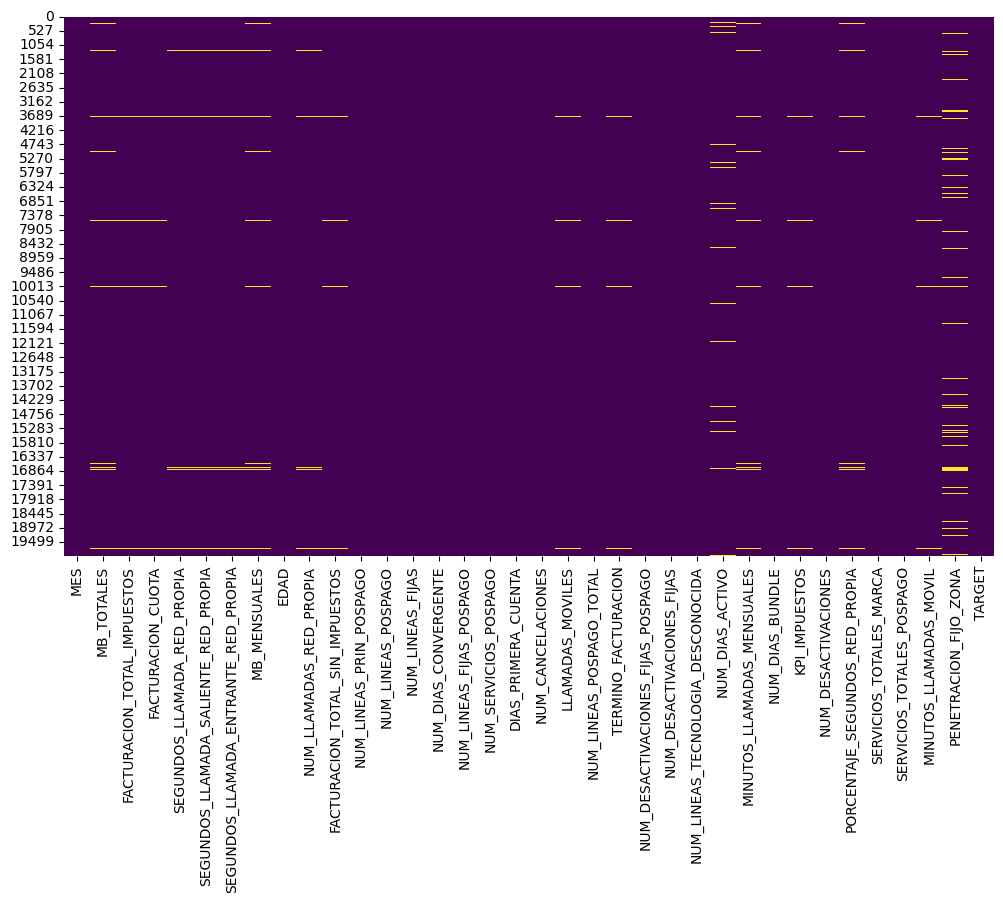

In [61]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [62]:
def detect_outliers(df):
    outliers = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers[column] = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].shape[0]
    return outliers

outliers = detect_outliers(df)
outliers

{'MES': 0,
 'MB_TOTALES': 1291,
 'FACTURACION_TOTAL_IMPUESTOS': 1037,
 'FACTURACION_CUOTA': 1791,
 'SEGUNDOS_LLAMADA_RED_PROPIA': 1807,
 'SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA': 1906,
 'SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA': 1342,
 'MB_MENSUALES': 1298,
 'EDAD': 40,
 'NUM_LLAMADAS_RED_PROPIA': 1425,
 'FACTURACION_TOTAL_SIN_IMPUESTOS': 1010,
 'NUM_LINEAS_PRIN_POSPAGO': 2675,
 'NUM_LINEAS_POSPAGO': 423,
 'NUM_LINEAS_FIJAS': 21,
 'NUM_DIAS_CONVERGENTE': 654,
 'NUM_LINEAS_FIJAS_POSPAGO': 21,
 'NUM_SERVICIOS_POSPAGO': 423,
 'DIAS_PRIMERA_CUENTA': 101,
 'NUM_CANCELACIONES': 1475,
 'LLAMADAS_MOVILES': 42,
 'NUM_LINEAS_POSPAGO_TOTAL': 1966,
 'TERMINO_FACTURACION': 2446,
 'NUM_DESACTIVACIONES_FIJAS_POSPAGO': 47,
 'NUM_DESACTIVACIONES_FIJAS': 47,
 'NUM_LINEAS_TECNOLOGIA_DESCONOCIDA': 423,
 'NUM_DIAS_ACTIVO': 125,
 'MINUTOS_LLAMADAS_MENSUALES': 1589,
 'NUM_DIAS_BUNDLE': 3133,
 'KPI_IMPUESTOS': 988,
 'NUM_DESACTIVACIONES': 132,
 'PORCENTAJE_SEGUNDOS_RED_PROPIA': 30,
 'SERVICIOS_TOTALES_MARCA': 545,

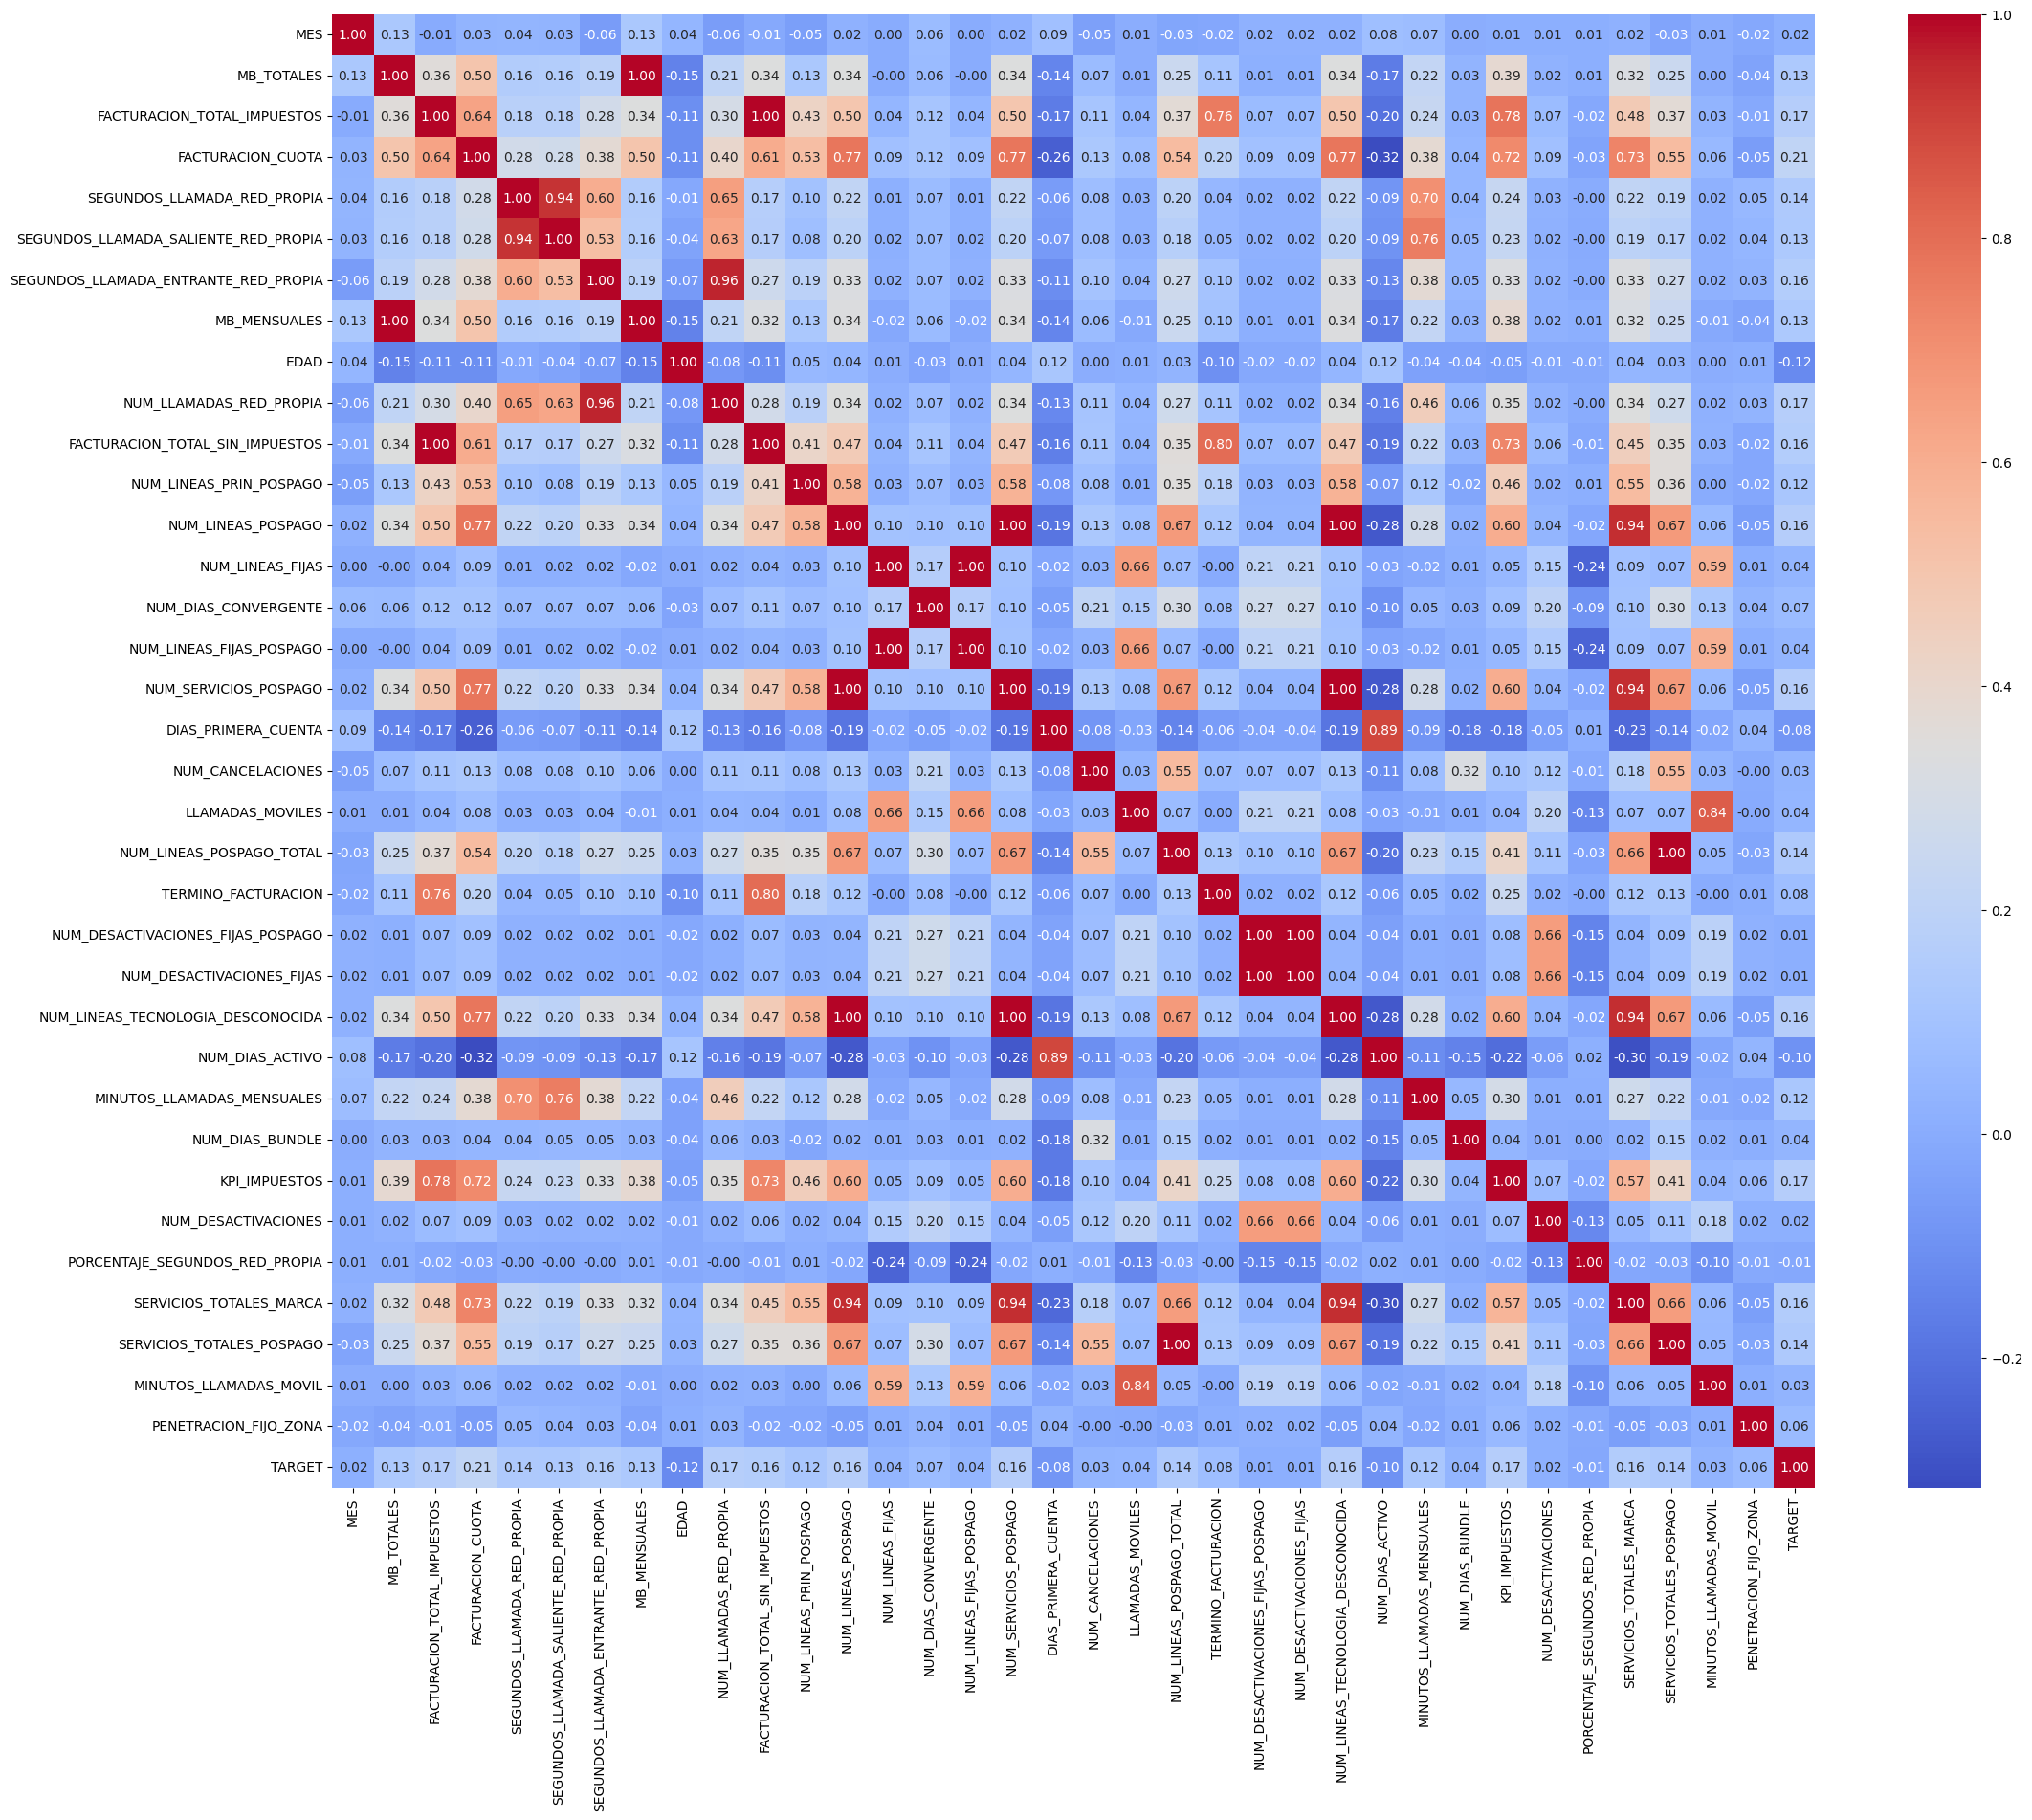

In [63]:
# Matriz de correlación
corr_matrix = df.corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [64]:
corr_threshold = 0.85

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Creamos una lista vacía para almacenar las columnas a eliminar
columns_to_drop = []

# Recorremos la matriz de correlación
for i in range(len(corr_matrix.columns)):
  for j in range(i + 1, len(corr_matrix.columns)):
    # Si la correlación entre dos columnas supera el umbral y no son la misma columna, agregamos la columna con el índice mayor a la lista de columnas a eliminar
    if corr_matrix.iloc[i, j] > corr_threshold and i != j:
      columns_to_drop.append(corr_matrix.columns[j])

# Eliminamos las columnas seleccionadas del DataFrame
df_reduced = df.drop(columns=columns_to_drop)

# Imprimimos las primeras filas del DataFrame reducido
df_reduced.head()

MES    MB_TOTALES  FACTURACION_TOTAL_IMPUESTOS  FACTURACION_CUOTA  \
0  201901    232.121597                    10.186000           0.000000   
1  201911  18280.292969                    32.005001          26.450001   
2  201906   2141.692810                    37.442001          31.400000   
3  202006   3181.986496                    20.001000          16.530000   
4  202001  25626.083984                    37.005001          26.450001   

   SEGUNDOS_LLAMADA_RED_PROPIA  SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA  EDAD  \
0                       4523.0                                  28.0  39.0   
1                      13288.0                                  49.0  25.0   
2                         13.0                                   0.0  47.0   
3                          0.0                                   0.0  43.0   
4                      72783.0                                 151.0  40.0   

   NUM_LINEAS_PRIN_POSPAGO  NUM_LINEAS_POSPAGO  NUM_LINEAS_FIJAS  ...  \
0                        1                   1                 0  ...   
1                        1                   1                 0  ...   
2                        2                   2                 0  ...   
3                        1                   2                 0  ...   
4                        1                   1                 0  ...   

   TERMINO_FACTURACION  NUM_DESACTIVACIONES_FIJAS_POSPAGO  \
0                  0.0                                  0   
1                  0.0                                  0   
2                  4.0                                  0   
3                  0.0                                  0   
4                  5.0                                  0   

   MINUTOS_LLAMADAS_MENSUALES  NUM_DIAS_BUNDLE  KPI_IMPUESTOS  \
0                   21.683399                0       1.767800   
1                  166.050007              435       5.555000   
2                  108.850102                0       2.042002   
3                   65.799899                0       3.471001   
4                  519.683305                1       5.555000   

   NUM_DESACTIVACIONES  PORCENTAJE_SEGUNDOS_RED_PROPIA  \
0                    0                           100.0   
1                    0                           100.0   
2                    0                           100.0   
3                    0                           100.0   
4                    0                           100.0   

   MINUTOS_LLAMADAS_MOVIL  PENETRACION_FIJO_ZONA  TARGET  
0                     0.0               0.264612       0  
1                     0.0               0.380171       0  
2                     0.0               0.156041       0  
3                     0.0               0.228810       1  
4                     0.0               0.210286       1  

[5 rows x 25 columns]

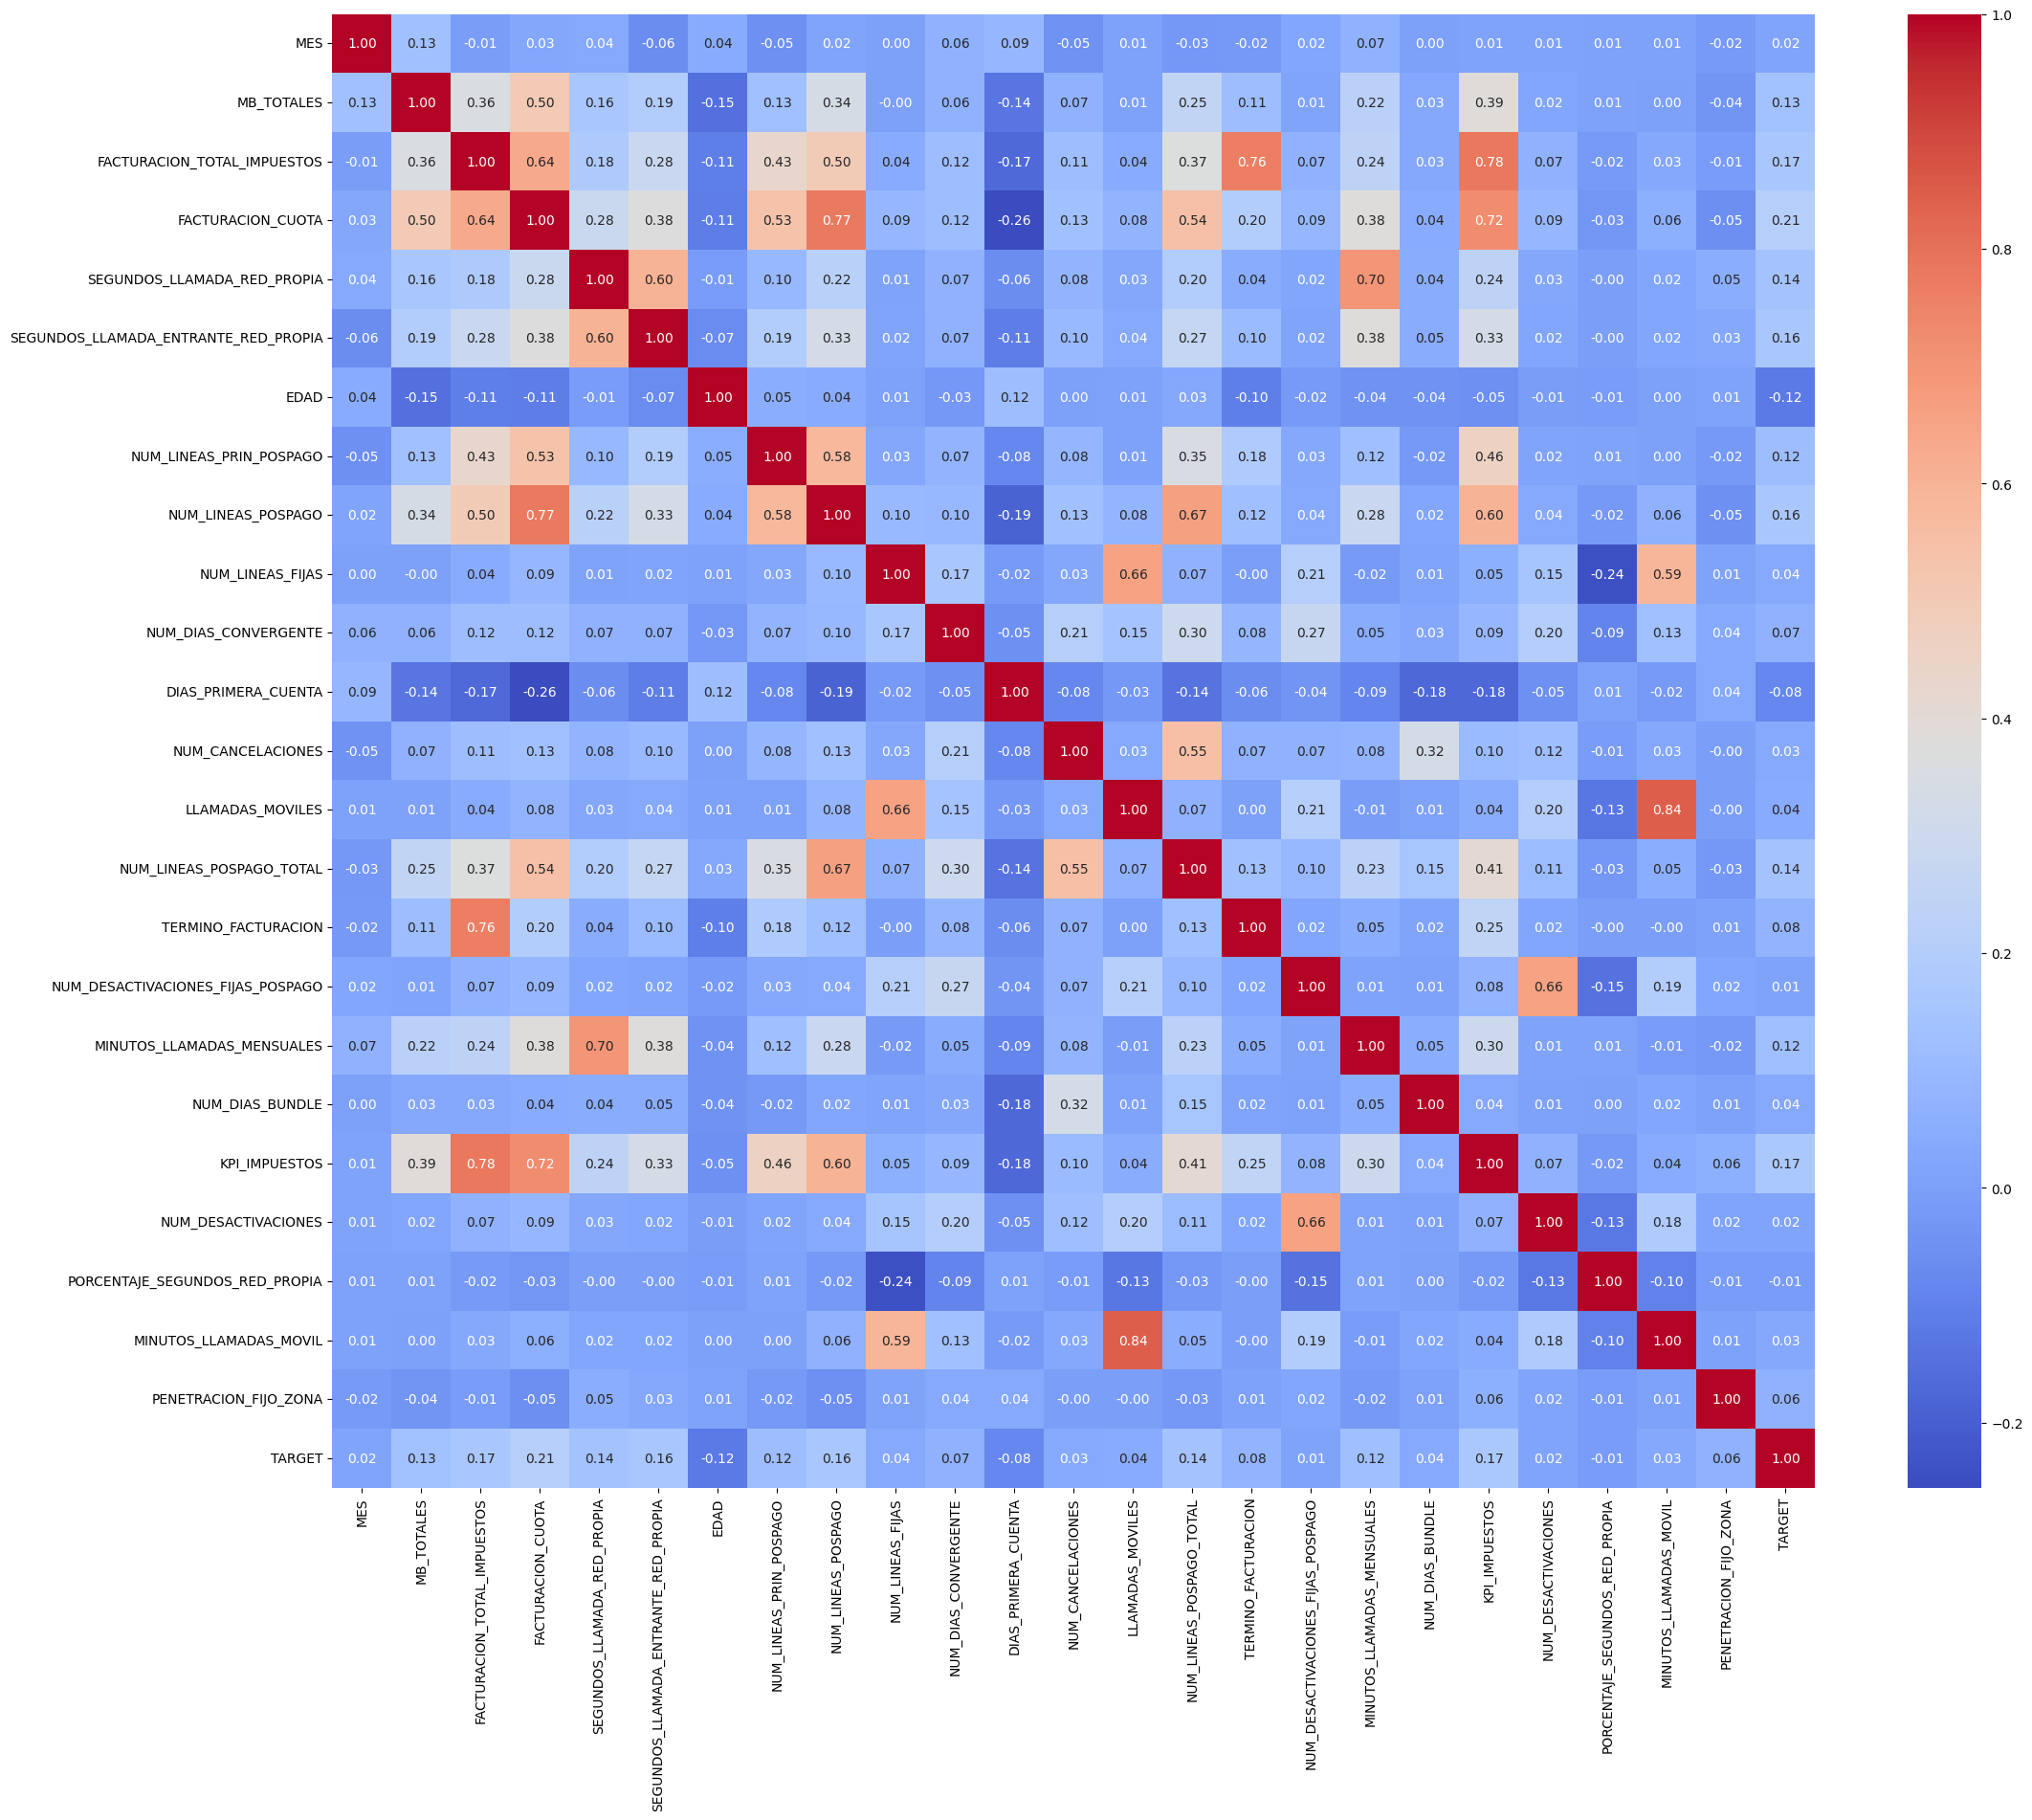

In [65]:
# Matriz de correlación
corr_matrix = df_reduced.corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [66]:
df_reduced.shape, df.shape

((20000, 25), (20000, 36))

In [67]:
# see the number of unique values in each column
for column in df_reduced.columns:
    print(f'{column}: {df_reduced[column].nunique()}')

MES: 23
MB_TOTALES: 19271
FACTURACION_TOTAL_IMPUESTOS: 11220
FACTURACION_CUOTA: 1329
SEGUNDOS_LLAMADA_RED_PROPIA: 13782
SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA: 522
EDAD: 78
NUM_LINEAS_PRIN_POSPAGO: 6
NUM_LINEAS_POSPAGO: 8
NUM_LINEAS_FIJAS: 3
NUM_DIAS_CONVERGENTE: 484
DIAS_PRIMERA_CUENTA: 3628
NUM_CANCELACIONES: 16
LLAMADAS_MOVILES: 40
NUM_LINEAS_POSPAGO_TOTAL: 16
TERMINO_FACTURACION: 514
NUM_DESACTIVACIONES_FIJAS_POSPAGO: 2
MINUTOS_LLAMADAS_MENSUALES: 19286
NUM_DIAS_BUNDLE: 1661
KPI_IMPUESTOS: 8767
NUM_DESACTIVACIONES: 5
PORCENTAJE_SEGUNDOS_RED_PROPIA: 31
MINUTOS_LLAMADAS_MOVIL: 43
PENETRACION_FIJO_ZONA: 52
TARGET: 2


In [68]:
# See the unique values in each column that has less than 10 unique values
for column in df_reduced.columns:
    if df_reduced[column].nunique() < 10:
        print(f'{column}: {df_reduced[column].unique()}')

NUM_LINEAS_PRIN_POSPAGO: [1 2 4 3 0 5]
NUM_LINEAS_POSPAGO: [1 2 3 4 5 6 7 8]
NUM_LINEAS_FIJAS: [0 1 2]
NUM_DESACTIVACIONES_FIJAS_POSPAGO: [0 1]
NUM_DESACTIVACIONES: [0 1 2 3 4]
TARGET: [0 1]


In [69]:
# Except for the target column, drop the columns which values being 0 are more than 90% of the total
columns_to_drop = []
for column in df_reduced.columns:
    if column != 'target':
        if df_reduced[column].value_counts(normalize=True).max() > 0.85:
            columns_to_drop.append(column)
df_reduced = df_reduced.drop(columns=columns_to_drop)

In [70]:
df_reduced.shape

(20000, 17)

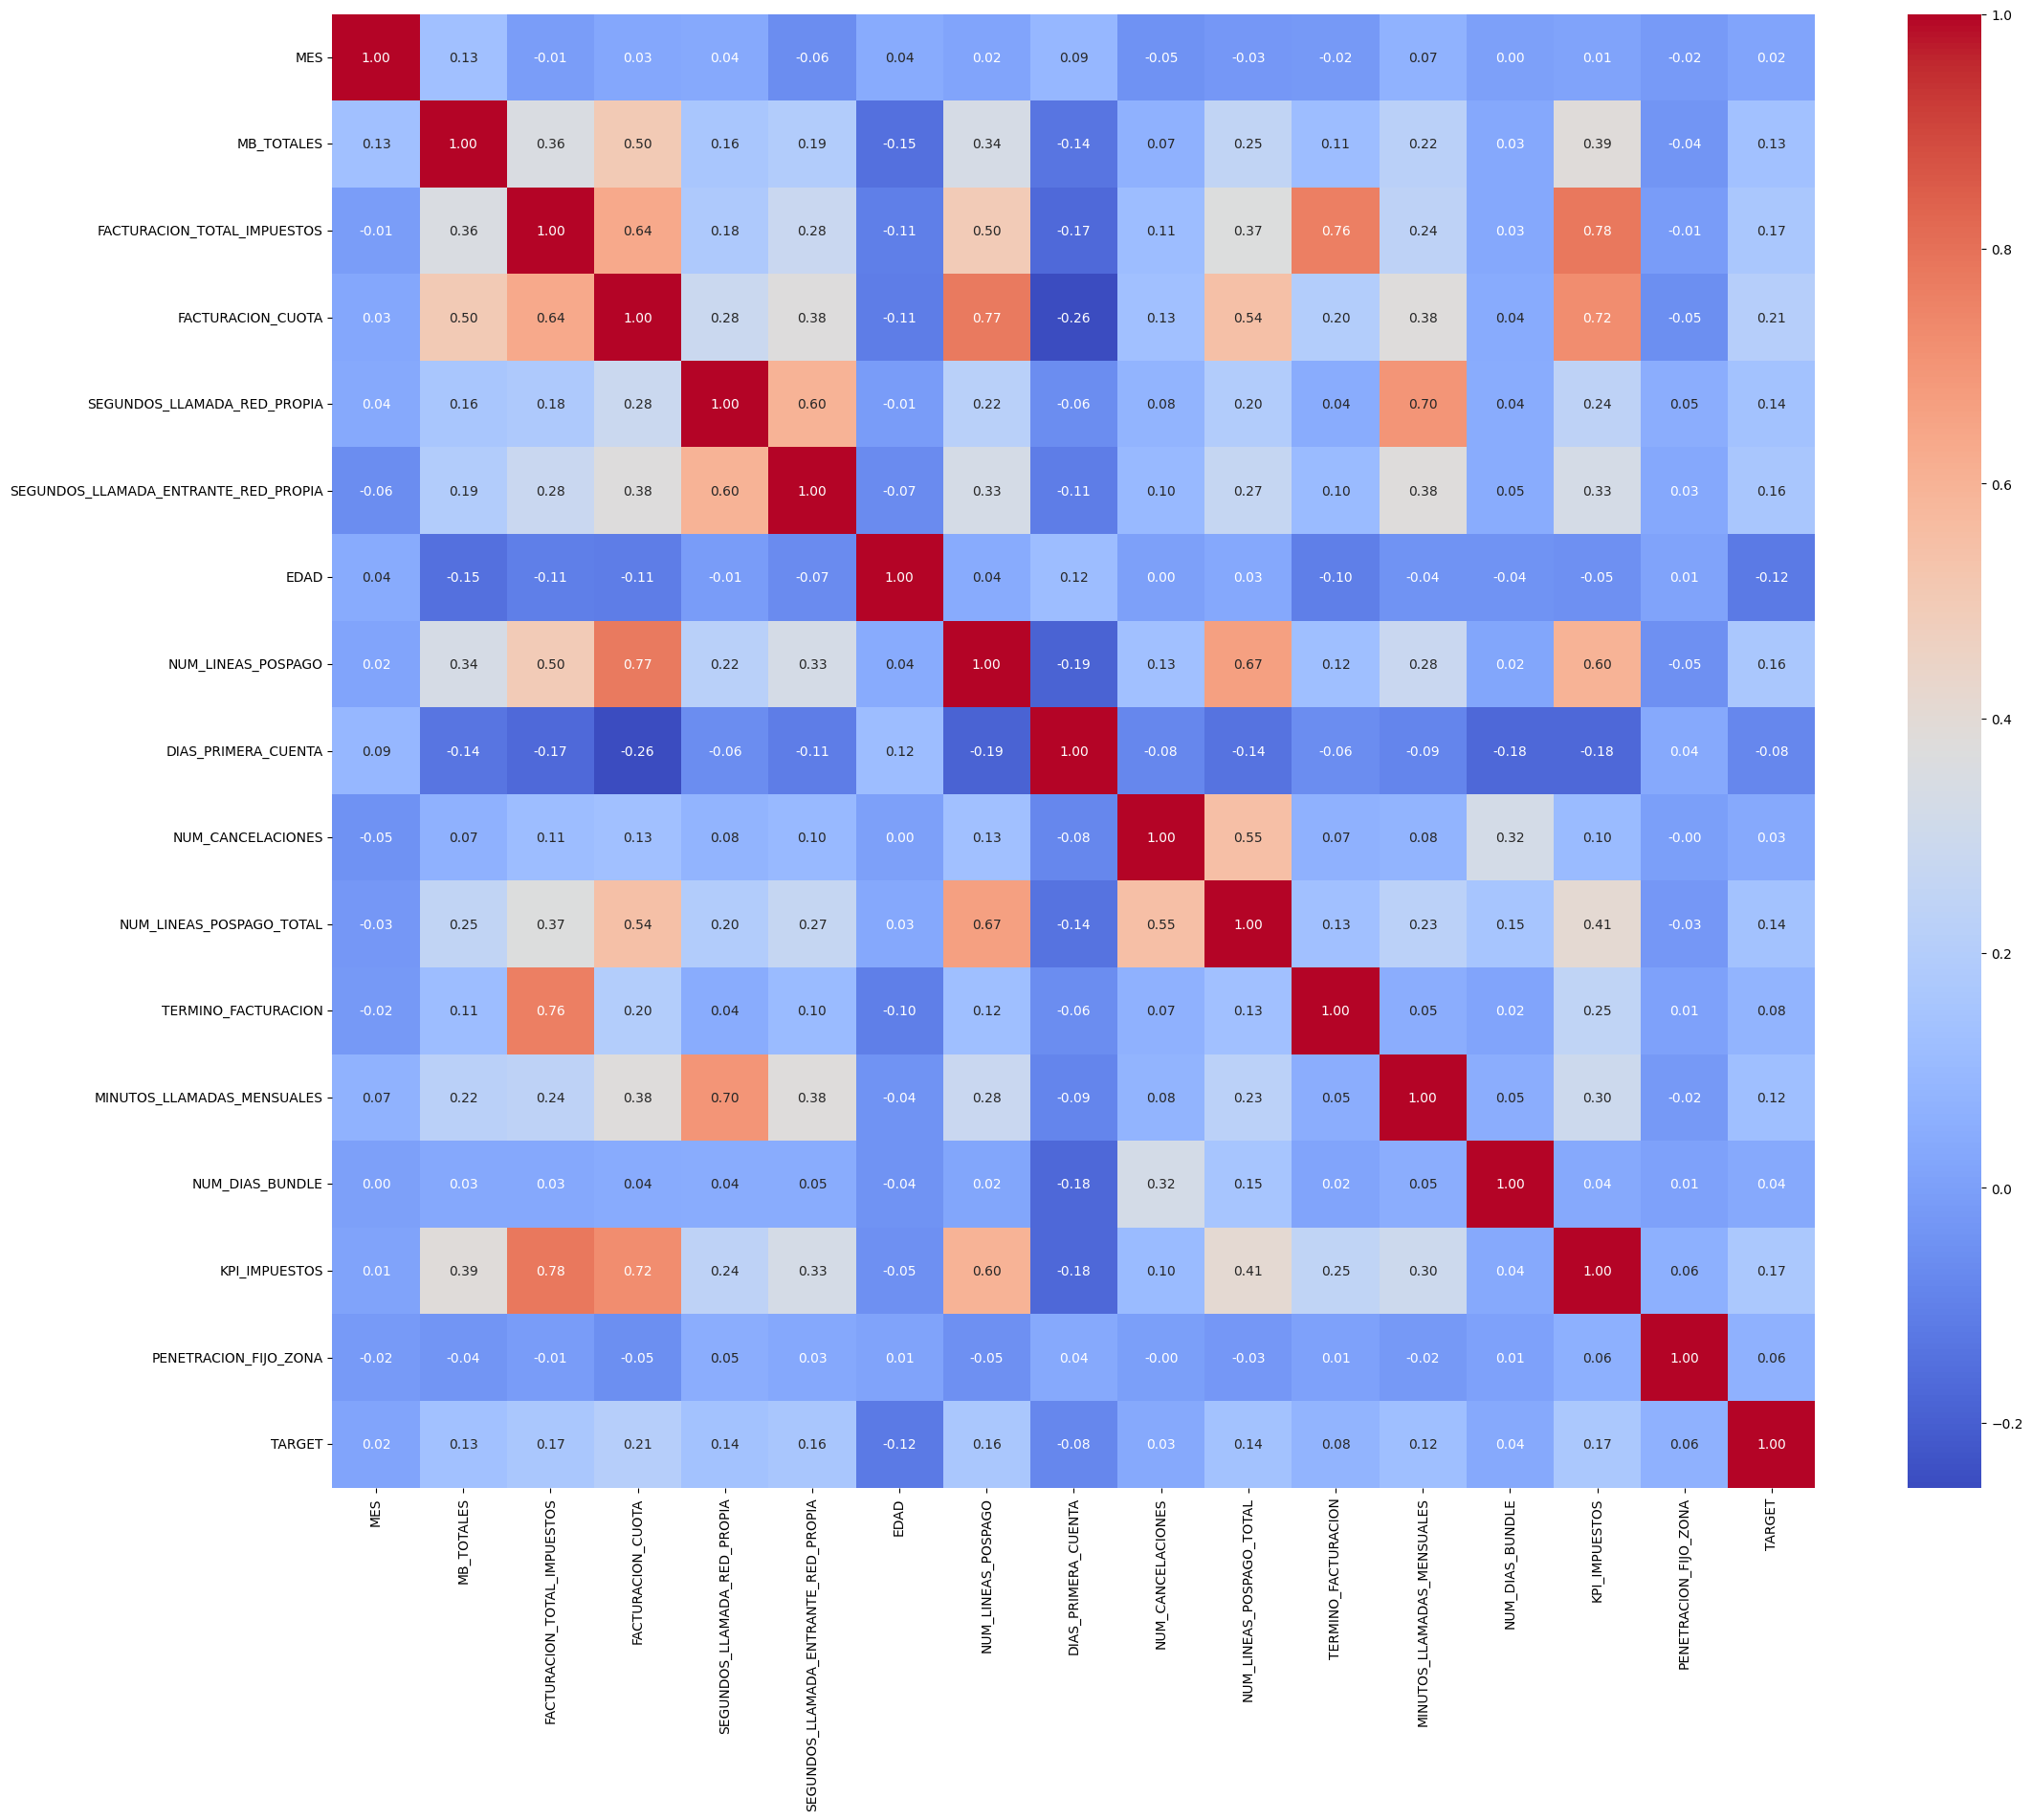

In [71]:
# Matriz de correlación
corr_matrix = df_reduced.corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

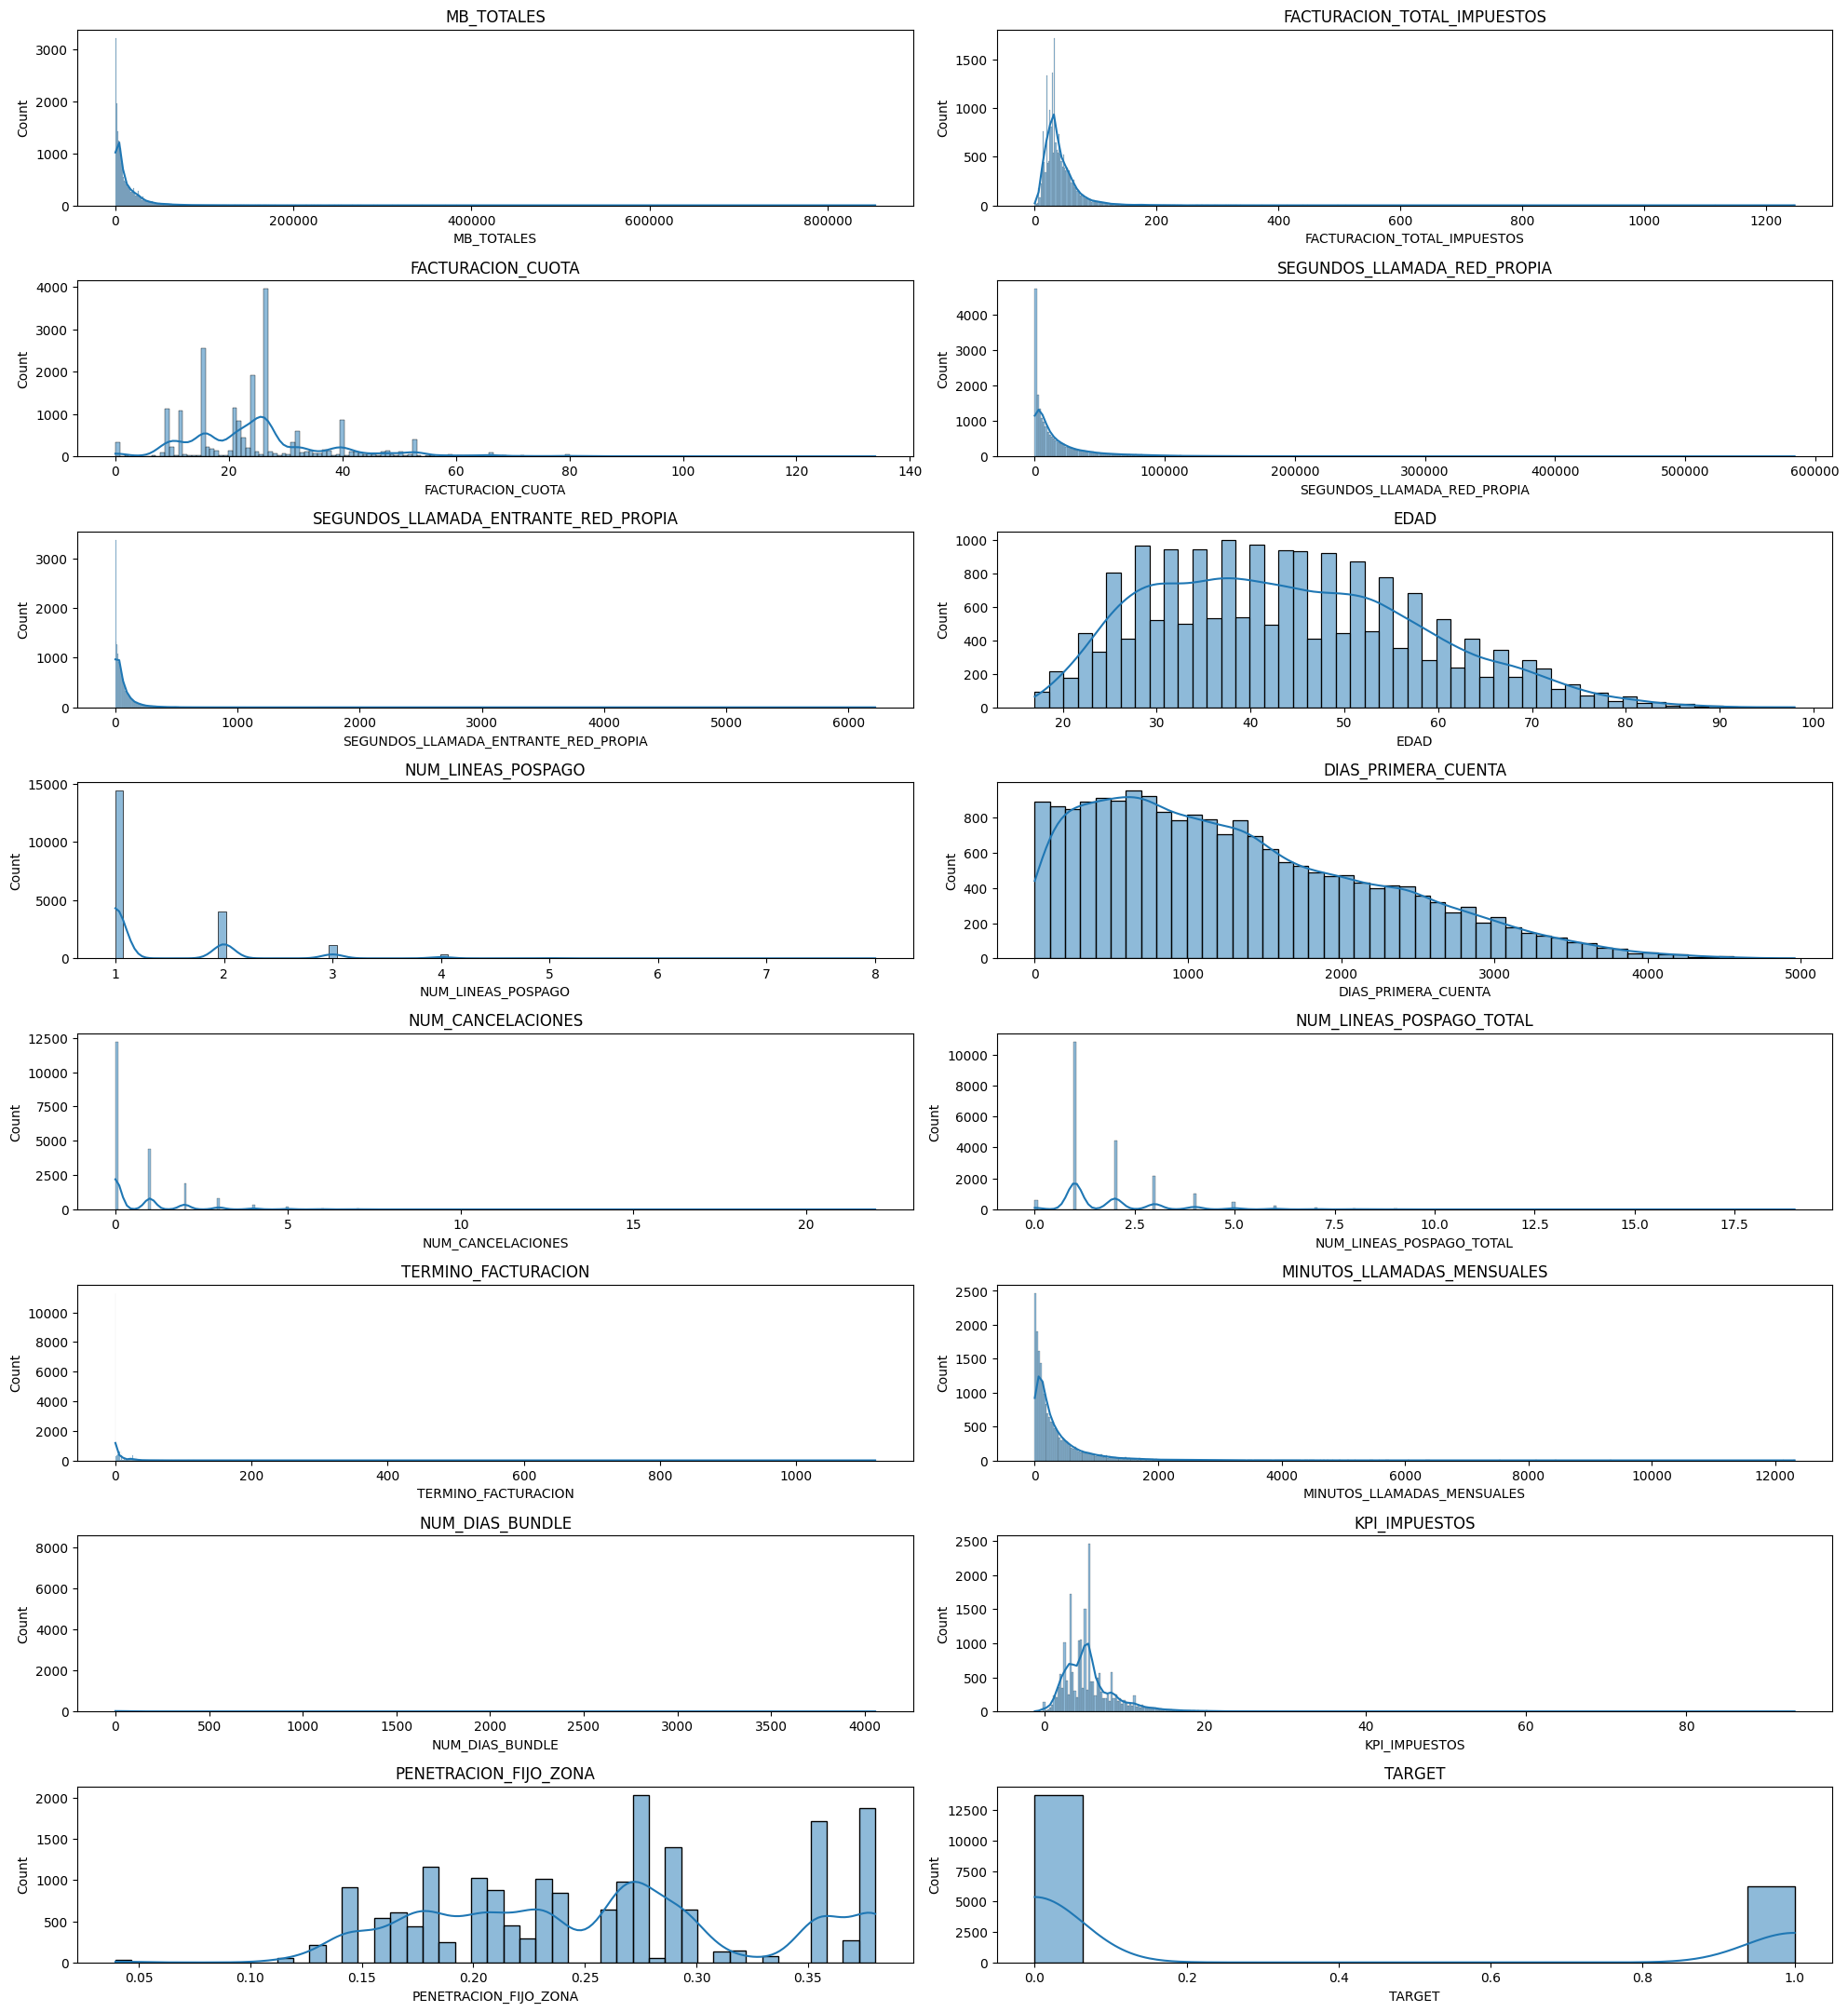

In [72]:
# Histograma de algunas variables
variables = df_reduced.columns[1:]
ax, fig = plt.subplots(figsize=(20, 35), nrows=13, ncols=2)
fig = fig.flatten()
for i, var in enumerate(variables):
    sns.histplot(df_reduced[var], ax=fig[i], kde=True)
    fig[i].set_title(var)
plt.tight_layout()
# delete the unused subplots
for i in range(len(variables), len(fig)):
    fig[i].set_visible(False)
plt.show()

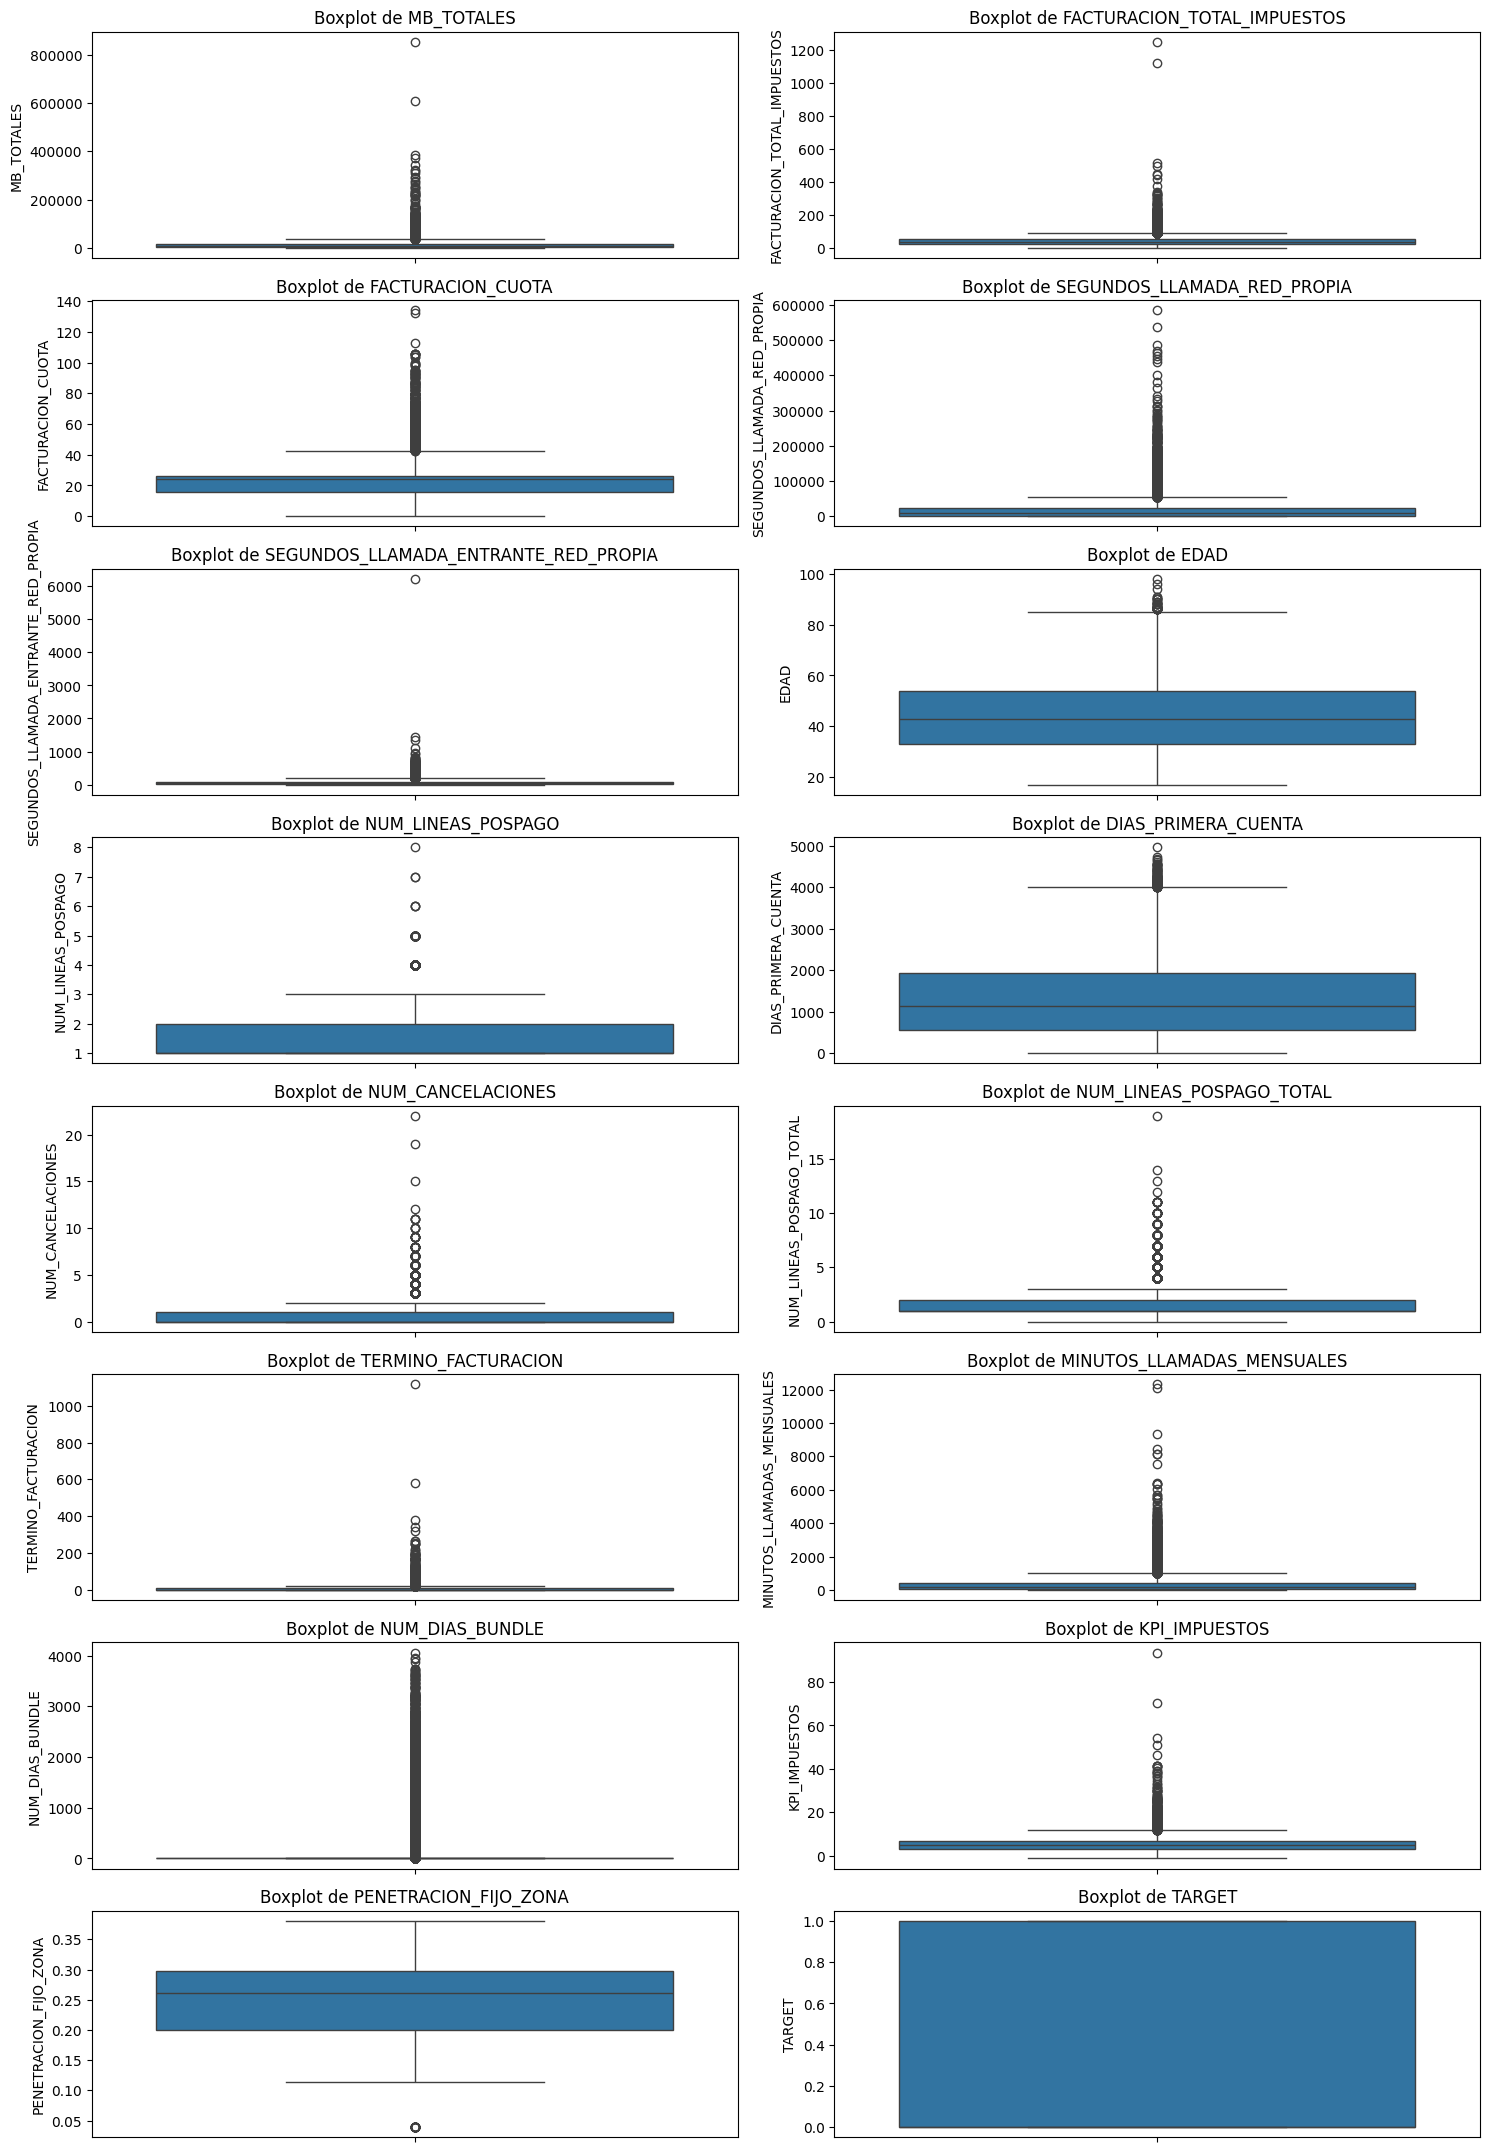

In [73]:
# Boxplot de algunas variables
plt.figure(figsize=(15, 35))
for i, column in enumerate(variables, 1):
    plt.subplot(13, 2, i)
    sns.boxplot(y=df_reduced[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

In [74]:
# Convertir la columna MES al formato de fecha
df_reduced['MES'] = pd.to_datetime(df_reduced['MES'], format='%Y%m')

# Crear nuevas columnas para año y mes
df_reduced['MES_AÑO'] = df_reduced['MES'].dt.year
df_reduced['MES_MES'] = df_reduced['MES'].dt.month

# Eliminar la columna original MES si no se va a usar directamente
df_reduced = df_reduced.drop('MES', axis=1)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21832\1746465516.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21832\1746465516.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




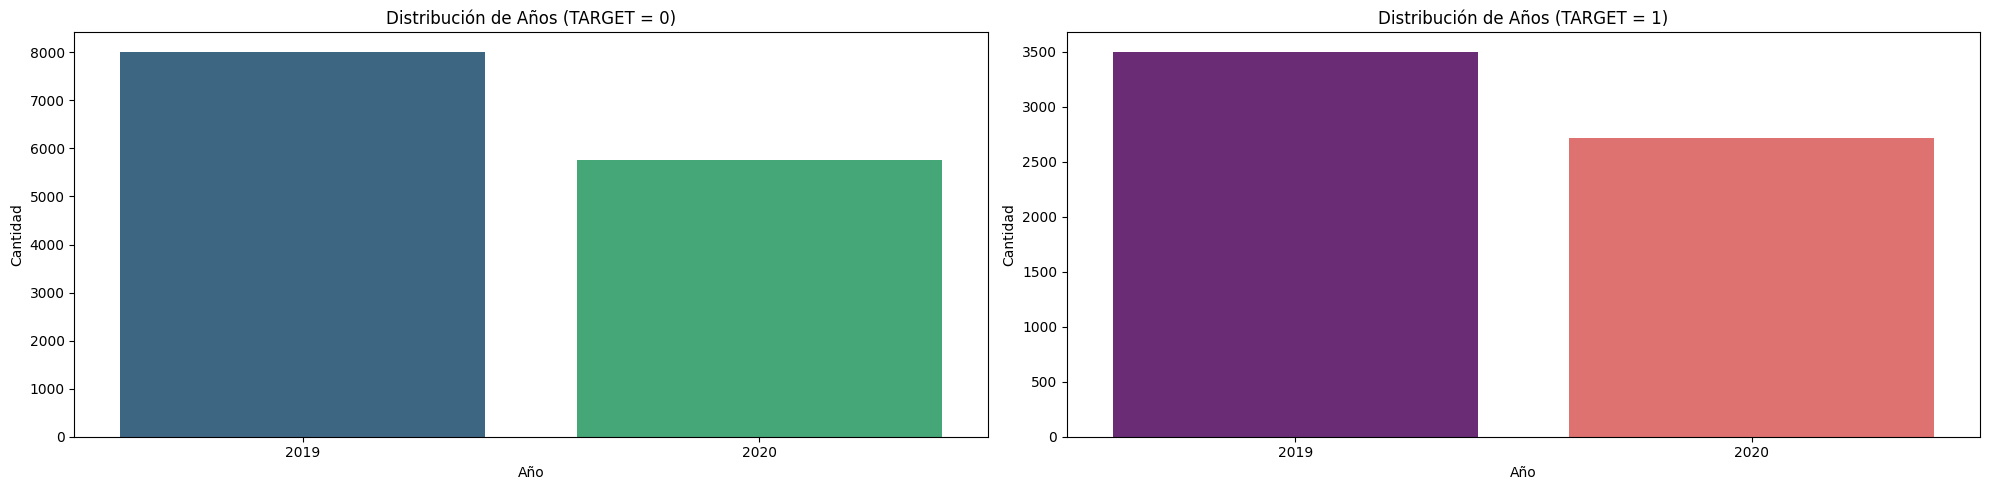

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21832\1746465516.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21832\1746465516.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




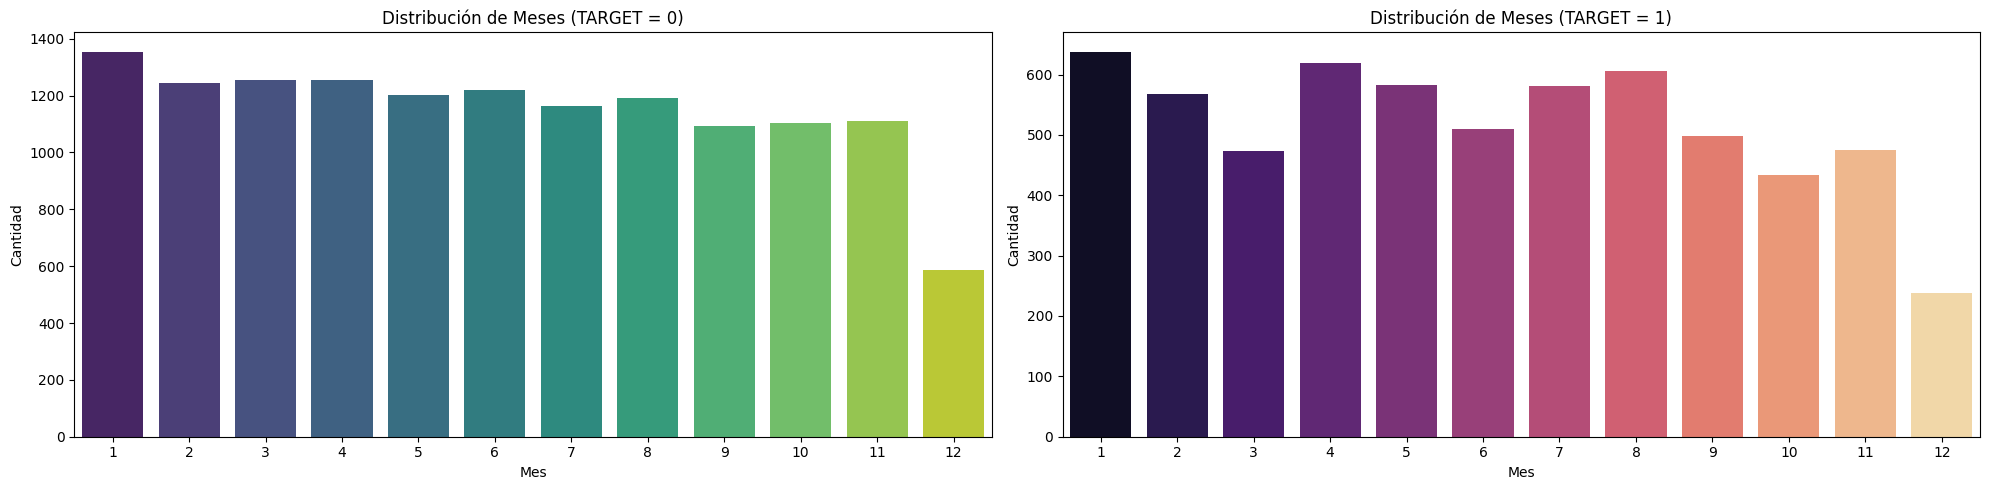

In [75]:
# Crear las figuras y los subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Distribución de años con TARGET 0
sns.countplot(ax=axes[0], x='MES_AÑO', data=df_reduced[df_reduced['TARGET'] == 0], palette='viridis')
axes[0].set_title('Distribución de Años (TARGET = 0)')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Cantidad')

# Distribución de años con TARGET 1
sns.countplot(ax=axes[1], x='MES_AÑO', data=df_reduced[df_reduced['TARGET'] == 1], palette='magma')
axes[1].set_title('Distribución de Años (TARGET = 1)')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()

# Crear las figuras y los subplots para la distribución de meses
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Distribución de meses con TARGET 0
sns.countplot(ax=axes[0], x='MES_MES', data=df_reduced[df_reduced['TARGET'] == 0], palette='viridis')
axes[0].set_title('Distribución de Meses (TARGET = 0)')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Cantidad')

# Distribución de meses con TARGET 1
sns.countplot(ax=axes[1], x='MES_MES', data=df_reduced[df_reduced['TARGET'] == 1], palette='magma')
axes[1].set_title('Distribución de Meses (TARGET = 1)')
axes[1].set_xlabel('Mes')
axes[1].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()

In [76]:
imputer = IterativeImputer(max_iter=1000, random_state=42, n_nearest_features=5, sample_posterior=True, initial_strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df_reduced.drop('TARGET', axis=1)), columns=df_reduced.drop('TARGET', axis=1).columns)
df_imputed['TARGET'] = df_reduced['TARGET']

In [77]:
vif_data = pd.DataFrame()
vif_data["feature"] = df_imputed.columns
vif_data["VIF"] = [variance_inflation_factor(df_imputed.values, i) for i in range(len(df_imputed.columns))]
vif_data

feature        VIF
0                             MB_TOTALES   1.883881
1            FACTURACION_TOTAL_IMPUESTOS  72.156156
2                      FACTURACION_CUOTA  21.098994
3            SEGUNDOS_LLAMADA_RED_PROPIA   3.617854
4   SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA   2.549872
5                                   EDAD   5.836594
6                     NUM_LINEAS_POSPAGO  17.505009
7                    DIAS_PRIMERA_CUENTA   3.337625
8                      NUM_CANCELACIONES   2.453740
9               NUM_LINEAS_POSPAGO_TOTAL   8.354539
10                   TERMINO_FACTURACION  12.037843
11            MINUTOS_LLAMADAS_MENSUALES   2.989762
12                       NUM_DIAS_BUNDLE   1.265862
13                         KPI_IMPUESTOS  33.749680
14                 PENETRACION_FIJO_ZONA   1.229265
15                               MES_AÑO  17.379100
16                               MES_MES   4.386139
17                                TARGET   1.549495

In [78]:
# Eliminar las columnas con VIF mayor a 10
columns_to_drop = vif_data[vif_data['VIF'] > 10]['feature'].values
df_cleaned = df_imputed.drop(columns=columns_to_drop)

In [102]:
from sklearn.neighbors import LocalOutlierFactor

# Asumiendo que 'X' es tu DataFrame de características
# Inicializar el detector LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # Puedes ajustar los parámetros según tus necesidades

# Ajustar el modelo y predecir los outliers
yhat = lof.fit_predict(df_imputed)

# Seleccionar todos los puntos que no son outliers
mask = yhat != -1
df_cleaned = df_imputed[mask]

# Mostrar la cantidad de outliers detectados y eliminados
print(f"Outliers detectados y eliminados: {np.sum(yhat == -1)}")
print(f"Datos restantes después de la limpieza: {df_cleaned.shape[0]}")

# X_cleaned ahora contiene el DataFrame sin los outliers

Outliers detectados y eliminados: 2000
Datos restantes después de la limpieza: 18000


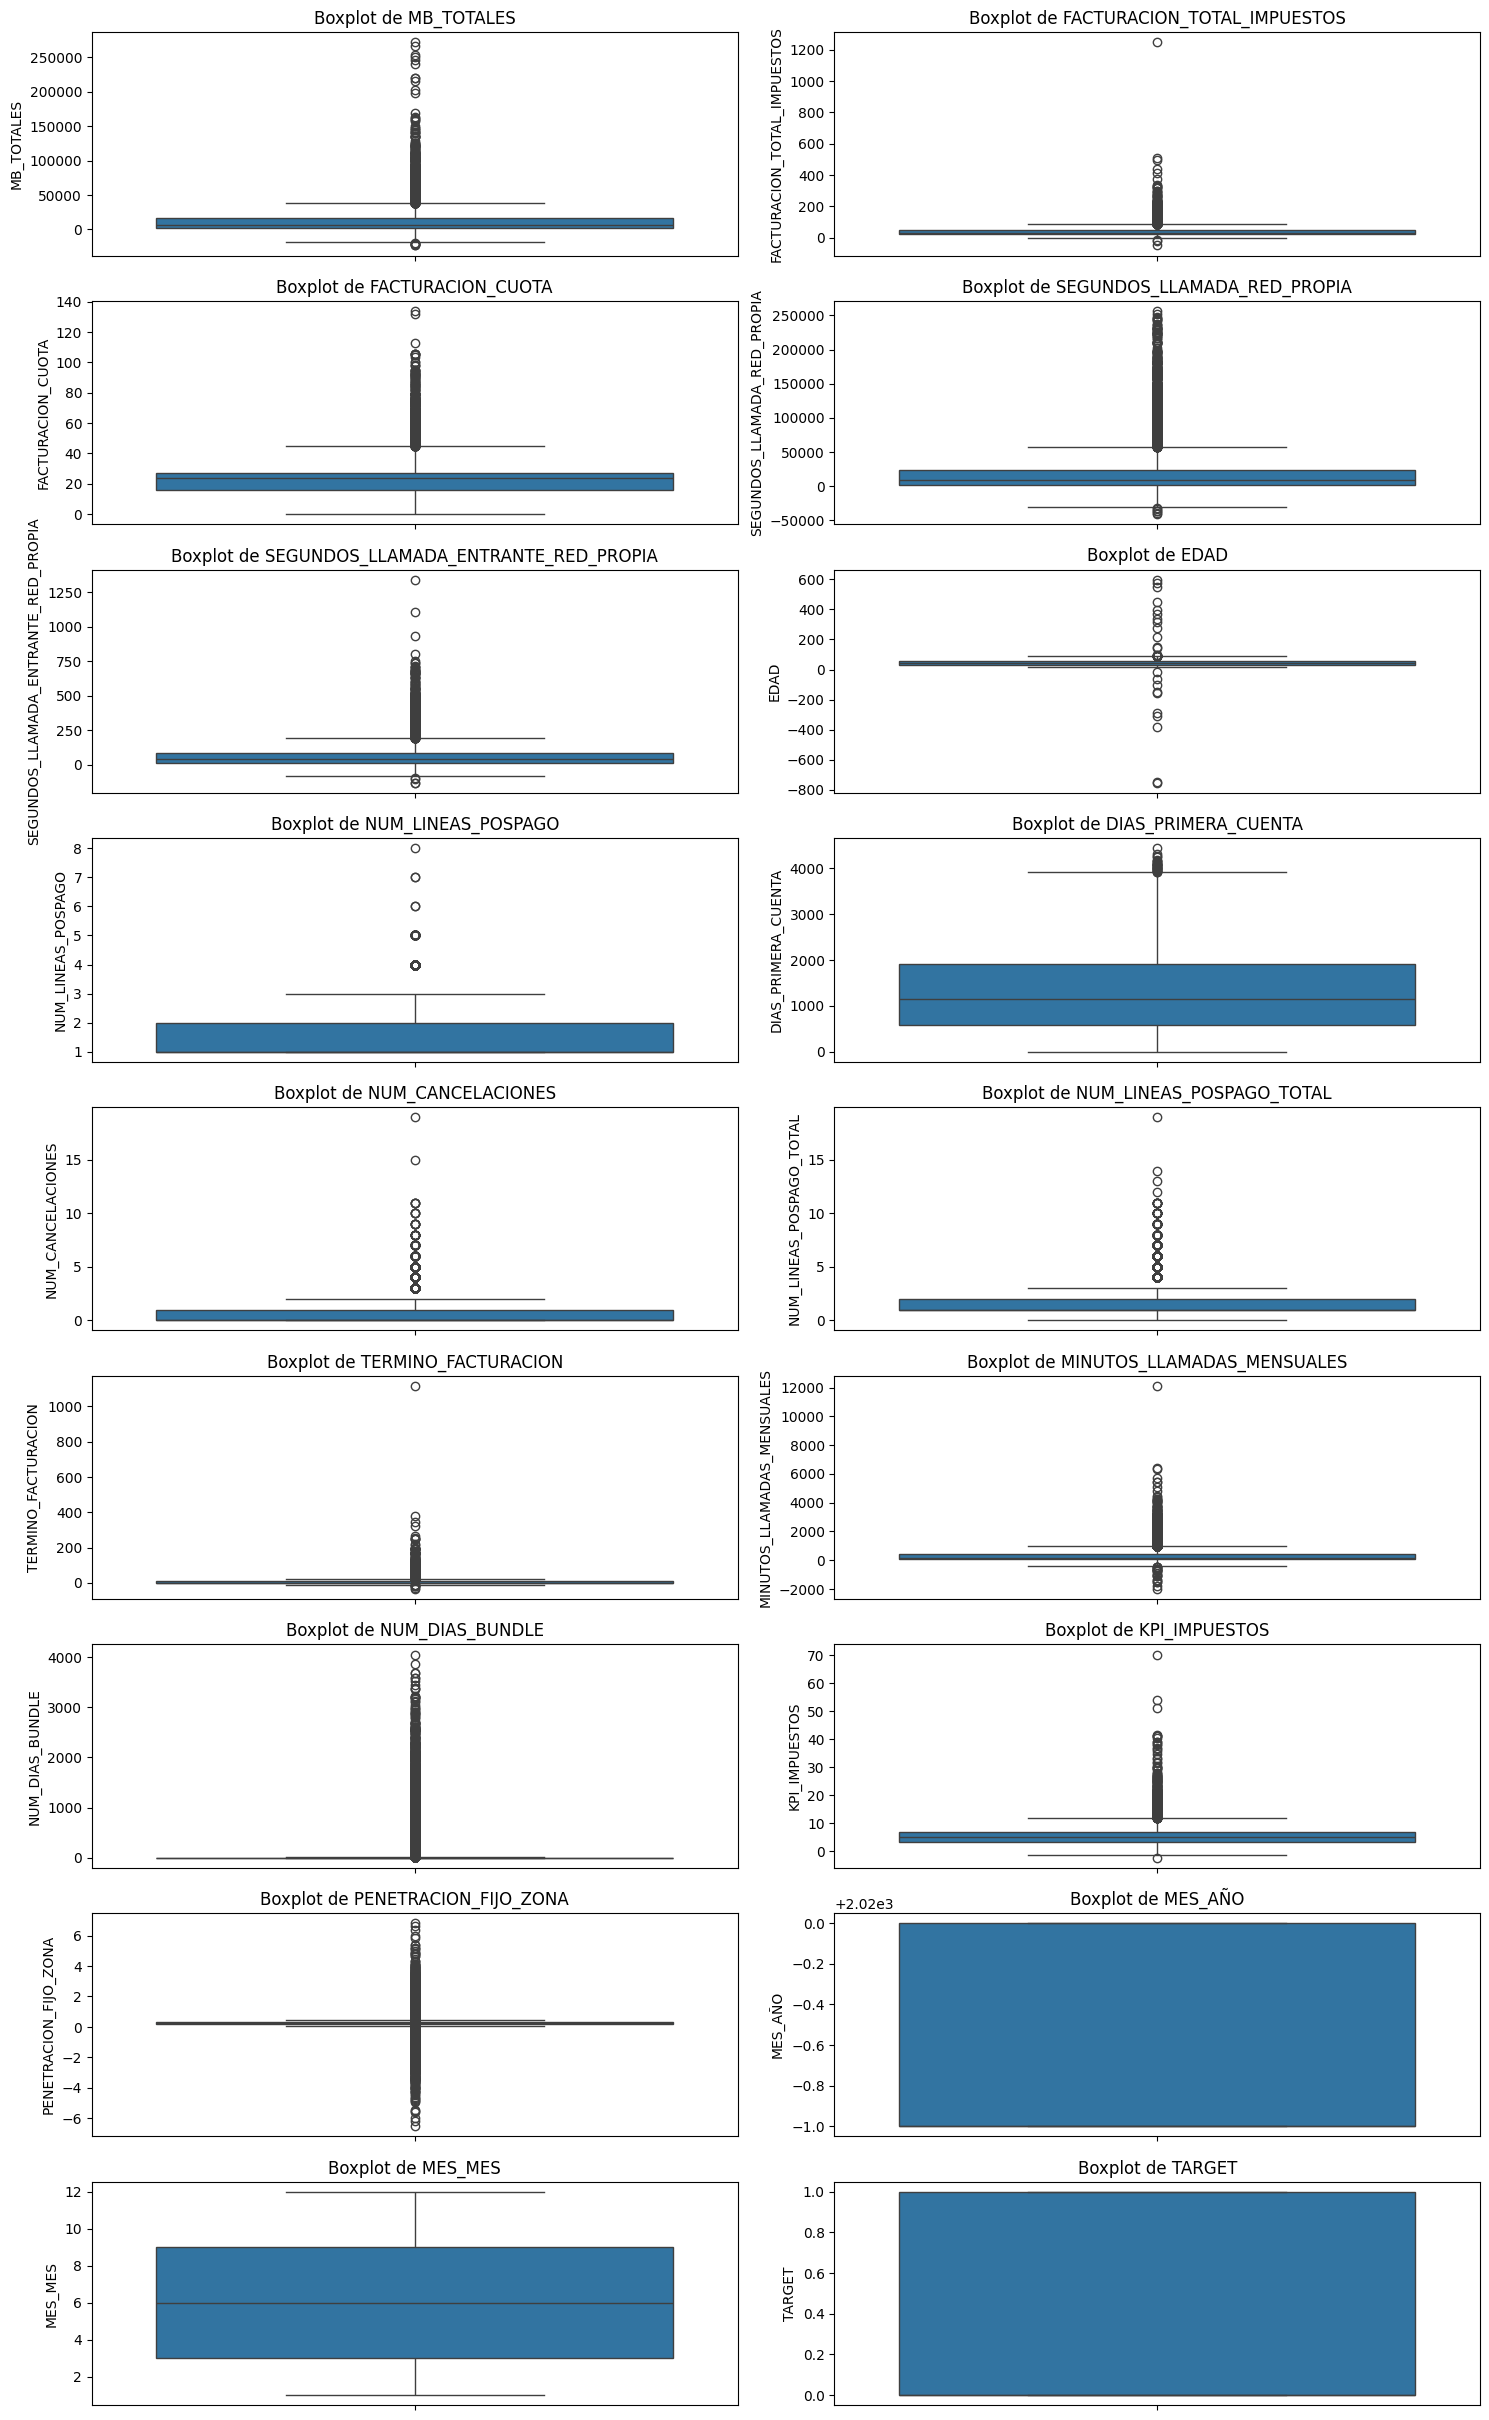

In [103]:
# Boxplot de algunas variables
plt.figure(figsize=(15, 35))
for i, column in enumerate(df_cleaned.columns, 1):
    plt.subplot(13, 2, i)
    sns.boxplot(y=df_cleaned[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

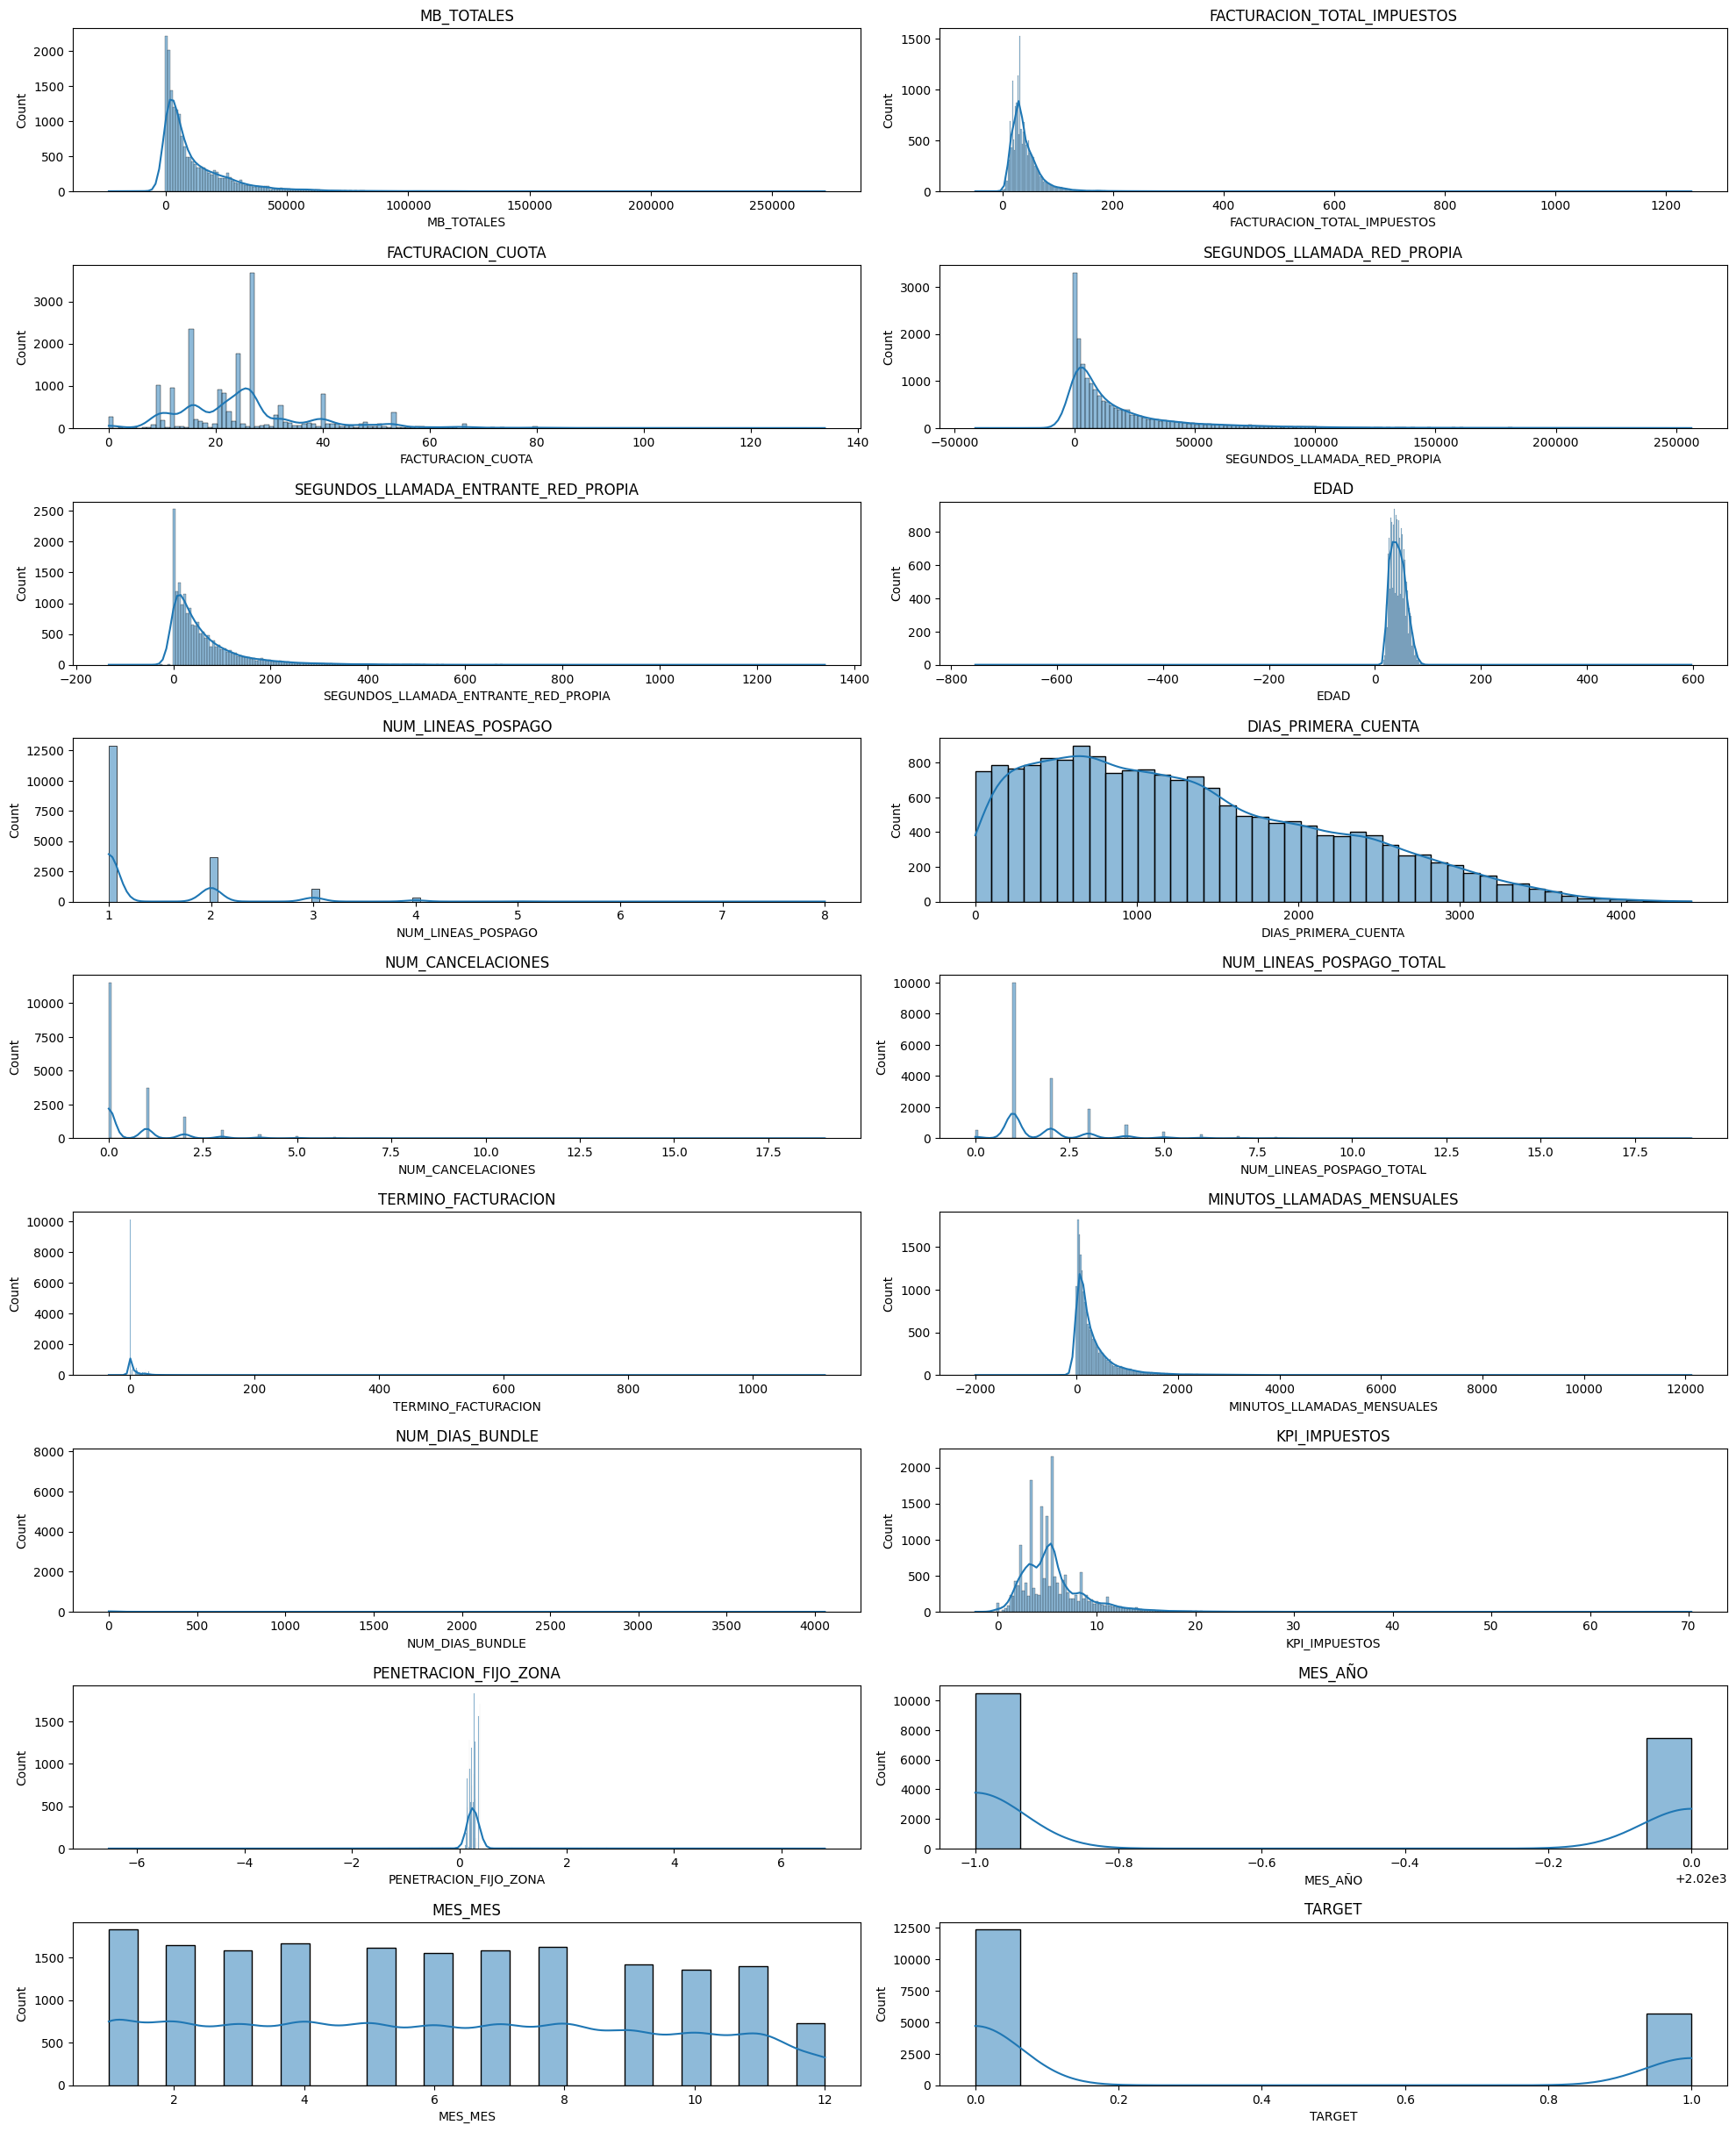

In [104]:
# Histograma de algunas variables
variables = df_cleaned.columns
ax, fig = plt.subplots(figsize=(20, 35), nrows=13, ncols=2)
fig = fig.flatten()
for i, var in enumerate(variables):
    sns.histplot(df_cleaned[var], ax=fig[i], kde=True)
    fig[i].set_title(var)
plt.tight_layout()
# delete the unused subplots
for i in range(len(variables), len(fig)):
    fig[i].set_visible(False)
plt.show()

In [105]:
df_cleaned.shape

(18000, 18)

In [1]:
df_cleaned.to_csv('./caso_final_small_20k_con_mes_cleaned.csv', index=False)

NameError: name 'df_cleaned' is not defined

In [107]:
# %pip install statsmodels
%pip install plotly
%pip install -U nbformat

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, fbeta_score, roc_auc_score, make_scorer, roc_curve, recall_score, precision_score, matthews_corrcoef
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
import optuna
import joblib
import gc
import torch
import logging
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
df_cleaned = pd.read_csv('./caso_final_small_20k_con_mes_cleaned.csv')

In [48]:
X = df_cleaned.drop('TARGET', axis=1)
y = df_cleaned['TARGET']

In [49]:
# Transformar las columnas MES_MES y MES_AÑO
mes_sin = np.sin(2 * np.pi * X['MES_MES'] / 12).values.reshape(-1, 1)
mes_cos = np.cos(2 * np.pi * X['MES_MES'] / 12).values.reshape(-1, 1)
mes_anio = pd.get_dummies(X['MES_AÑO'], drop_first=True)

X['MES_SIN'] = mes_sin
X['MES_COS'] = mes_cos
X = pd.concat([X, mes_anio], axis=1)
X = X.drop(['MES_MES', 'MES_AÑO'], axis=1)

In [50]:
X.head()

MB_TOTALES  FACTURACION_TOTAL_IMPUESTOS  FACTURACION_CUOTA  \
0    232.121597                    10.186000           0.000000   
1  18280.292969                    32.005001          26.450001   
2   2141.692810                    37.442001          31.400000   
3   3181.986496                    20.001000          16.530000   
4  25626.083984                    37.005001          26.450001   

   SEGUNDOS_LLAMADA_RED_PROPIA  SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA  EDAD  \
0                       4523.0                                  28.0  39.0   
1                      13288.0                                  49.0  25.0   
2                         13.0                                   0.0  47.0   
3                          0.0                                   0.0  43.0   
4                      72783.0                                 151.0  40.0   

   NUM_LINEAS_POSPAGO  DIAS_PRIMERA_CUENTA  NUM_CANCELACIONES  \
0                 1.0                 44.0                0.0   
1                 1.0                387.0                1.0   
2                 2.0               1389.0                0.0   
3                 2.0                154.0                2.0   
4                 1.0               2205.0                0.0   

   NUM_LINEAS_POSPAGO_TOTAL  TERMINO_FACTURACION  MINUTOS_LLAMADAS_MENSUALES  \
0                       1.0                  0.0                   21.683399   
1                       2.0                  0.0                  166.050007   
2                       2.0                  4.0                  108.850102   
3                       3.0                  0.0                   65.799899   
4                       1.0                  5.0                  519.683305   

   NUM_DIAS_BUNDLE  KPI_IMPUESTOS  PENETRACION_FIJO_ZONA       MES_SIN  \
0              0.0       1.767800               0.264612  5.000000e-01   
1            435.0       5.555000               0.380171 -5.000000e-01   
2              0.0       2.042002               0.156041  1.224647e-16   
3              0.0       3.471001               0.228810  1.224647e-16   
4              1.0       5.555000               0.210286  5.000000e-01   

    MES_COS  2020.0  
0  0.866025   False  
1  0.866025   False  
2 -1.000000   False  
3 -1.000000    True  
4  0.866025    True

In [51]:
print(X.dtypes)

MB_TOTALES                              float64
FACTURACION_TOTAL_IMPUESTOS             float64
FACTURACION_CUOTA                       float64
SEGUNDOS_LLAMADA_RED_PROPIA             float64
SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA    float64
EDAD                                    float64
NUM_LINEAS_POSPAGO                      float64
DIAS_PRIMERA_CUENTA                     float64
NUM_CANCELACIONES                       float64
NUM_LINEAS_POSPAGO_TOTAL                float64
TERMINO_FACTURACION                     float64
MINUTOS_LLAMADAS_MENSUALES              float64
NUM_DIAS_BUNDLE                         float64
KPI_IMPUESTOS                           float64
PENETRACION_FIJO_ZONA                   float64
MES_SIN                                 float64
MES_COS                                 float64
2020.0                                     bool
dtype: object


In [52]:
# Asegúrate de que todas las columnas sean numéricas o binarias (convertir booleanos a enteros)
X = X.astype({col: 'int' for col in X.select_dtypes(include='bool').columns})

# Asegúrate de que no hay valores infinitos ni NaNs
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

# Calcular VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

feature        VIF
0                             MB_TOTALES   2.383537
1            FACTURACION_TOTAL_IMPUESTOS  81.402667
2                      FACTURACION_CUOTA  21.538770
3            SEGUNDOS_LLAMADA_RED_PROPIA   5.088221
4   SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA   3.747541
5                                   EDAD   4.412100
6                     NUM_LINEAS_POSPAGO  17.912320
7                    DIAS_PRIMERA_CUENTA   2.688353
8                      NUM_CANCELACIONES   2.368821
9               NUM_LINEAS_POSPAGO_TOTAL   8.623860
10                   TERMINO_FACTURACION  13.261246
11            MINUTOS_LLAMADAS_MENSUALES   3.738289
12                       NUM_DIAS_BUNDLE   1.193556
13                         KPI_IMPUESTOS  36.786770
14                 PENETRACION_FIJO_ZONA   1.221128
15                               MES_SIN   1.019554
16                               MES_COS   1.012652
17                                2020.0   1.776910

In [53]:
# Eliminar las columnas con VIF mayor a 10
columns_to_drop = vif_data[vif_data['VIF'] > 10]['feature'].values
X = X.drop(columns=columns_to_drop)
X.columns = X.columns.astype(str)
X.shape

(18000, 13)

In [54]:
X = X.values
y = y.values

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled.copy(), y_train.copy())

In [58]:
X_test, X_val, y_test, y_val = train_test_split(X_test_scaled, y_test, test_size=0.5, random_state=42, stratify=y_test, shuffle=True)

In [59]:
pruner = optuna.pruners.SuccessiveHalvingPruner(min_resource=1, reduction_factor=4, min_early_stopping_rate=0)

In [60]:
def optimize_lr(trial):
    try:
        C = trial.suggest_float('C', 1e-10, 1e10, log=True)
        penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet'])
        solver = trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'])
        if penalty == 'elasticnet':
            l1_ratio = trial.suggest_float('l1_ratio', 0, 1)
        else:
            l1_ratio = None
        lr = LogisticRegression(C=C, penalty=penalty, solver=solver, random_state=42, max_iter=10000, l1_ratio=l1_ratio)
        use_resampled = trial.suggest_categorical('use_resampled', [True, False])
        if use_resampled:
            lr.fit(X_train_resampled, y_train_resampled)
        else:
            lr.fit(X_train_scaled, y_train)
        y_pred = lr.predict(X_val)
        del lr
        gc.collect()
        return roc_auc_score(y_val, y_pred)
    except Exception as e:
        logging.error(f'Error in Logistic Regression optimization: {e}')
        return float('-inf')

In [61]:
optuna.logging.set_verbosity(optuna.logging.ERROR)

# Cargar el estudio desde la base de datos SQLite
study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_lr.db', load_if_exists=True, study_name='Logistic Regression AUC', pruner=pruner)

# Continuar la optimización
study.optimize(optimize_lr, n_trials=1000, gc_after_trial=True)

# Guardar el mejor modelo encontrado
best_lr = study.best_params

# Serializar el estudio para guardarlo
joblib.dump(study, 'optuna_study_lr.pkl')

# Imprimir los mejores parámetros
best_lr

ERROR:root:Error in Logistic Regression optimization: Solver newton-cg supports only 'l2' or None penalties, got l1 penalty.
ERROR:root:Error in Logistic Regression optimization: Solver sag supports only 'l2' or None penalties, got l1 penalty.
ERROR:root:Error in Logistic Regression optimization: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.
ERROR:root:Error in Logistic Regression optimization: Solver newton-cg supports only 'l2' or None penalties, got l1 penalty.
ERROR:root:Error in Logistic Regression optimization: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.
ERROR:root:Error in Logistic Regression optimization: Solver sag supports only 'l2' or None penalties, got l1 penalty.
ERROR:root:Error in Logistic Regression optimization: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.
ERROR:root:Error in Logistic Regression optimization: Solver newton-cholesky supports only 'l2' or None penalties, got l1 penalty.
ERROR:roo

{'C': 0.002706582004202838,
 'penalty': 'l1',
 'solver': 'liblinear',
 'use_resampled': True}

In [62]:
study.best_value

0.6202387020290818

In [63]:
study = optuna.load_study(study_name='Logistic Regression AUC', storage='sqlite:///optuna_study_lr.db')

In [64]:
optuna.visualization.plot_optimization_history(study)

In [65]:
optuna.visualization.plot_param_importances(study)

In [66]:
optuna.visualization.plot_slice(study)

In [67]:
best_lr = study.best_params
use_resampled = best_lr.pop('use_resampled')
lr = LogisticRegression(**best_lr, random_state=42, max_iter=10000)
if use_resampled:
    lr.fit(X_train_resampled, y_train_resampled)
else:
    lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71      1234
           1       0.42      0.53      0.47       566

    accuracy                           0.62      1800
   macro avg       0.59      0.60      0.59      1800
weighted avg       0.65      0.62      0.63      1800



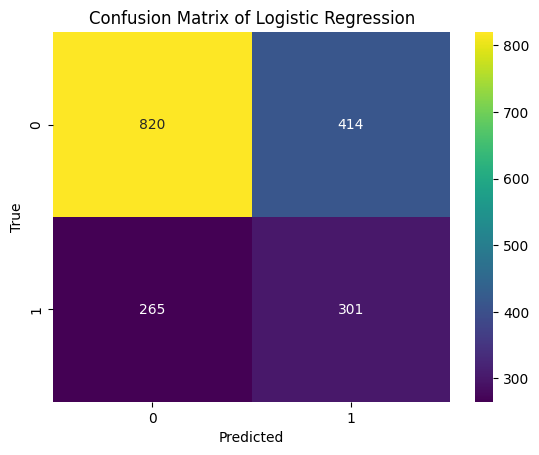

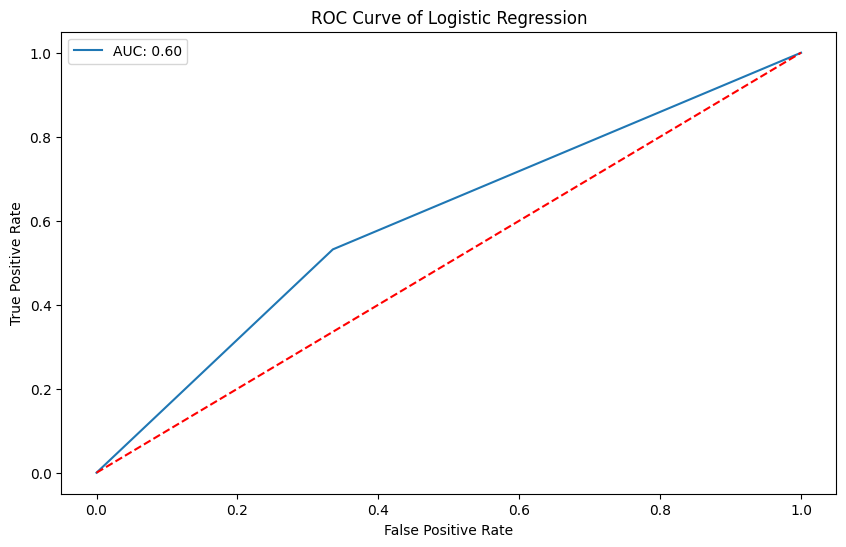

array([[0.56592474, 0.43407526],
       [0.58291947, 0.41708053],
       [0.5370025 , 0.4629975 ],
       ...,
       [0.53355231, 0.46644769],
       [0.47512545, 0.52487455],
       [0.44296537, 0.55703463]])

In [68]:
y_pred = lr.predict(X_test)

# roc auc curve painted of logistic regression
roc_auc_lr = roc_auc_score(y_test, y_pred)

# Confusion matrix of logistic regression
cm_lr = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_lr, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

# roc auc curve painted of logistic regression
roc_auc_lr

# plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_lr:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Logistic Regression')
plt.legend()
plt.show()
lr.predict_proba(X_test)

In [69]:
def optimize_random_forest(trial):
    try:
        # Definir los hiperparámetros
        n_estimators = trial.suggest_int('n_estimators', 100, 10000)
        max_depth = trial.suggest_int('max_depth', 10, 100)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 100)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 100)
        criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
        max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
        
        class_weight_option = trial.suggest_int('class_weight', 0, 5)
        
        # Asignar pesos según el valor entero seleccionado
        if class_weight_option == 0:
            class_weight = None
        elif class_weight_option == 1:
            class_weight = 'balanced'
        elif class_weight_option == 2:
            class_weight = {0: 1, 1: 2}
        elif class_weight_option == 3:
            class_weight = {0: 1, 1: 3}
        elif class_weight_option == 4:
            class_weight = {0: 1, 1: 4}
        elif class_weight_option == 5:
            class_weight = {0: 1, 1: 5}
        
        # Registro de hiperparámetros seleccionados
        logging.info(f"Trial {trial.number} - Params: n_estimators: {n_estimators}, max_depth: {max_depth}, min_samples_split: {min_samples_split}, min_samples_leaf: {min_samples_leaf}, criterion: {criterion}, max_features: {max_features}, class_weight: {class_weight}")

        # Crear el modelo de RandomForest
        rf = RandomForestClassifier(
            n_estimators=n_estimators, 
            max_depth=max_depth, 
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf, 
            random_state=42, 
            criterion=criterion, 
            max_features=max_features, 
            n_jobs=2,
            class_weight=class_weight
        )
        
        logging.info(f"Trial {trial.number} - Model created")
        
        use_resampled = trial.suggest_categorical('use_resampled', [True, False])
        if use_resampled:
            rf.fit(X_train_resampled, y_train_resampled)
        else:
            rf.fit(X_train_scaled, y_train)
        
        # Predecir en el conjunto de validación
        y_pred = rf.predict(X_val)
        
        return roc_auc_score(y_val, y_pred)
    except Exception as e:
        logging.error(f"Optimization error in trial {trial.number}: {e}")
        return float('-inf')


In [70]:
print(np.bincount(y_train))
print(np.bincount(y_val))

[9873 4527]
[1234  566]


In [71]:
optuna.logging.set_verbosity(optuna.logging.DEBUG)

# Cargar el estudio desde la base de datos SQLite
study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_rf.db', load_if_exists=True, study_name='RandomForest AUC', pruner=pruner)

# Continuar la optimización
study.optimize(optimize_random_forest, n_trials=500, gc_after_trial=True)

# Guardar el mejor modelo encontrado
best_rf = study.best_params

# Serializar el estudio para guardarlo
joblib.dump(study, 'optuna_study_rf.pkl')

# Imprimir los mejores parámetros
best_rf

[I 2024-06-06 17:15:43,792] A new study created in RDB with name: RandomForest AUC
[I 2024-06-06 17:16:04,295] Trial 0 finished with value: 0.5854026951337544 and parameters: {'n_estimators': 3290, 'max_depth': 29, 'min_samples_split': 27, 'min_samples_leaf': 49, 'criterion': 'gini', 'max_features': 'log2', 'class_weight': 5, 'use_resampled': False}. Best is trial 0 with value: 0.5854026951337544.
[I 2024-06-06 17:16:27,908] Trial 1 finished with value: 0.603059085624617 and parameters: {'n_estimators': 4207, 'max_depth': 76, 'min_samples_split': 52, 'min_samples_leaf': 73, 'criterion': 'gini', 'max_features': 'log2', 'class_weight': 4, 'use_resampled': False}. Best is trial 1 with value: 0.603059085624617.
[I 2024-06-06 17:17:25,411] Trial 2 finished with value: 0.5596497356982092 and parameters: {'n_estimators': 4829, 'max_depth': 43, 'min_samples_split': 41, 'min_samples_leaf': 37, 'criterion': 'gini', 'max_features': 'sqrt', 'class_weight': 4, 'use_resampled': True}. Best is trial 

In [ ]:
best_rf

{'n_estimators': 458,
 'max_depth': 50,
 'min_samples_split': 41,
 'min_samples_leaf': 41,
 'criterion': 'entropy',
 'max_features': 'log2',
 'class_weight': 1,
 'use_resampled': False}

In [ ]:
study.best_value

0.29411725347728834

In [ ]:
study = optuna.load_study(study_name='RandomForest AUC', storage='sqlite:///optuna_study_rf.db')

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
best_rf = study.best_params
class_weight_option = best_rf['class_weight']
use_resampled = best_rf['use_resampled']
if class_weight_option == 0:
    class_weight = None
elif class_weight_option == 1:
    class_weight = 'balanced'
elif class_weight_option == 2:
    class_weight = {0: 1, 1: 2}
elif class_weight_option == 3:
    class_weight = {0: 1, 1: 3}
else:
    class_weight = {0: 1, 1: 5}

best_rf.pop('class_weight')
best_rf.pop('use_resampled')

rf = RandomForestClassifier(**best_rf,
                            class_weight=class_weight,
                            random_state=42,
                            n_jobs=-1)

if use_resampled:
    rf.fit(X_train_resampled, y_train_resampled)
else:
    rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.63      0.70      1234
           1       0.43      0.59      0.50       566

    accuracy                           0.62      1800
   macro avg       0.60      0.61      0.60      1800
weighted avg       0.66      0.62      0.63      1800



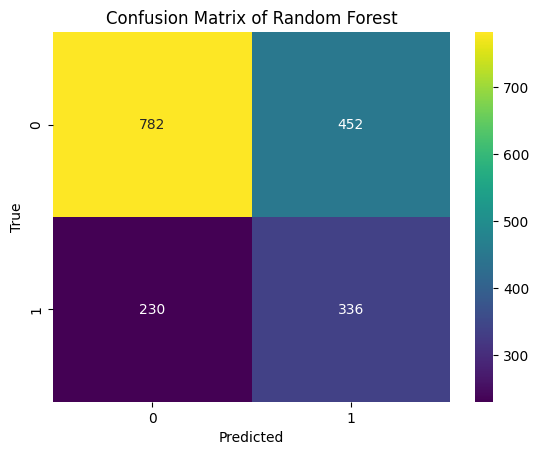

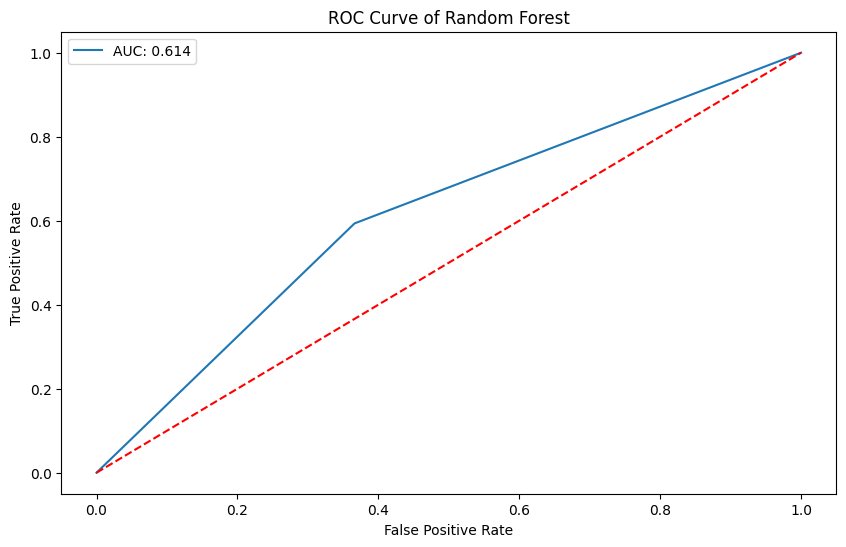

In [ ]:
# roc auc curve painted of random forest
roc_auc_rf = roc_auc_score(y_test, y_pred)

# Confusion matrix of random forest
cm_rf = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_rf, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Random Forest')
plt.show()

# roc auc curve painted of random forest
roc_auc_rf

# plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_rf:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.legend()

In [ ]:
def optimize_xgboost(trial):
    try:
        n_estimators = trial.suggest_int('n_estimators', 100, 500)
        max_depth = trial.suggest_int('max_depth', 1, 100)
        learning_rate = trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True)
        booster = trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart'])
        subsample = trial.suggest_float('subsample', 0.1, 1.0)
        colsample_bytree = trial.suggest_float('colsample_bytree', 0.1, 1.0)
        min_child_weight = trial.suggest_int('min_child_weight', 1, 6)
        
        xgb_model = xgb.XGBClassifier(
            n_estimators=n_estimators, 
            max_depth=max_depth, 
            learning_rate=learning_rate,
            booster=booster, 
            subsample=subsample, 
            colsample_bytree=colsample_bytree,
            random_state=42, 
            min_child_weight=min_child_weight, 
            n_jobs=-1
        )
        
        use_resample = trial.suggest_categorical('use_resample', [True, False])
        if use_resample:
            xgb_model.fit(X_train_resampled, y_train_resampled)
        else:
            xgb_model.fit(X_train, y_train)
        y_pred = xgb_model.predict(X_val)
        
        return roc_auc_score(y_val, y_pred)
    except Exception as e:
        logging.error(f"Optimization error: {e}")
        return float('-inf')

In [ ]:
# Cargar el estudio desde la base de datos SQLite
study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_xgb.db', load_if_exists=True, study_name='XGBoost AUC', pruner=pruner)

# Continuar la optimización
study.optimize(optimize_xgboost, n_trials=500, gc_after_trial=True)

# Guardar el mejor modelo encontrado
best_xgb = study.best_params

# Serializar el estudio para guardarlo
joblib.dump(study, 'optuna_study_xgb.pkl')

# Imprimir los mejores parámetros
best_xgb

[I 2024-06-06 12:35:15,329] Using an existing study with name 'XGBoost MCC' instead of creating a new one.


[W 2024-06-06 12:35:23,936] Trial 518 failed with parameters: {'n_estimators': 230, 'max_depth': 61, 'learning_rate': 0.0012907242838069057, 'booster': 'dart', 'subsample': 0.14363981568811848, 'colsample_bytree': 0.7148311317755427, 'min_child_weight': 4, 'use_resample': True} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\Usuario\AppData\Local\Temp\ipykernel_27524\676228103.py", line 25, in optimize_xgboost
    xgb_model.fit(X_train_resampled, y_train_resampled)
  File "d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
  File "d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\xgboost\sklearn.py", line 1519, in fit
    self._Booste

KeyboardInterrupt: 

In [ ]:
study = optuna.load_study(study_name='XGBoost AUC', storage='sqlite:///optuna_study_xgb.db')

best_xgb = study.best_params

best_xgb

{'n_estimators': 241,
 'max_depth': 10,
 'learning_rate': 0.0020982194529360243,
 'booster': 'gbtree',
 'subsample': 0.10952672467849861,
 'colsample_bytree': 0.7908043426880785,
 'min_child_weight': 2,
 'use_resample': True}

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

[W 2024-06-06 13:00:07,842] Trial 12 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 13:00:07,842] Trial 13 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 13:00:07,842] Trial 14 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 13:00:07,843] Trial 16 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 13:00:07,843] Trial 17 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 13:00:07,843] Trial 18 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 13:00:07,844] Trial 21 is omitted in visualization because its objective value is inf or nan.


In [ ]:
optuna.visualization.plot_slice(study)

[W 2024-06-06 13:00:09,026] Trial 12 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 13:00:09,027] Trial 13 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 13:00:09,027] Trial 14 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 13:00:09,027] Trial 16 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 13:00:09,028] Trial 17 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 13:00:09,028] Trial 18 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 13:00:09,028] Trial 21 is omitted in visualization because its objective value is inf or nan.


In [ ]:
study.best_value

0.2625087655294166

In [ ]:
use_resample = best_xgb.pop('use_resample')
xgb_model = xgb.XGBClassifier(**best_xgb, random_state=42, n_jobs=-1)
if use_resample:
    xgb_model.fit(X_train_resampled, y_train_resampled)
else:
    xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
type(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.67      0.71      1234
           1       0.44      0.56      0.49       566

    accuracy                           0.63      1800
   macro avg       0.60      0.61      0.60      1800
weighted avg       0.66      0.63      0.64      1800



str

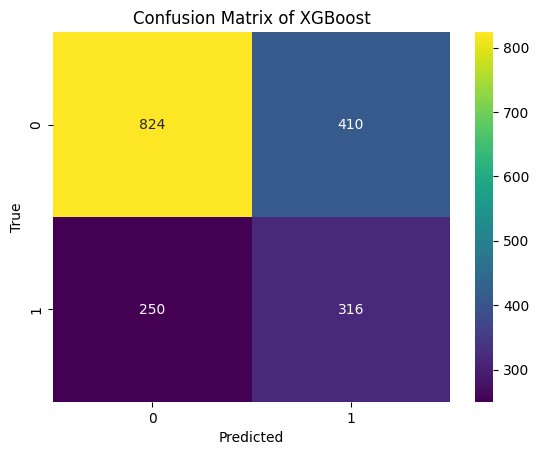

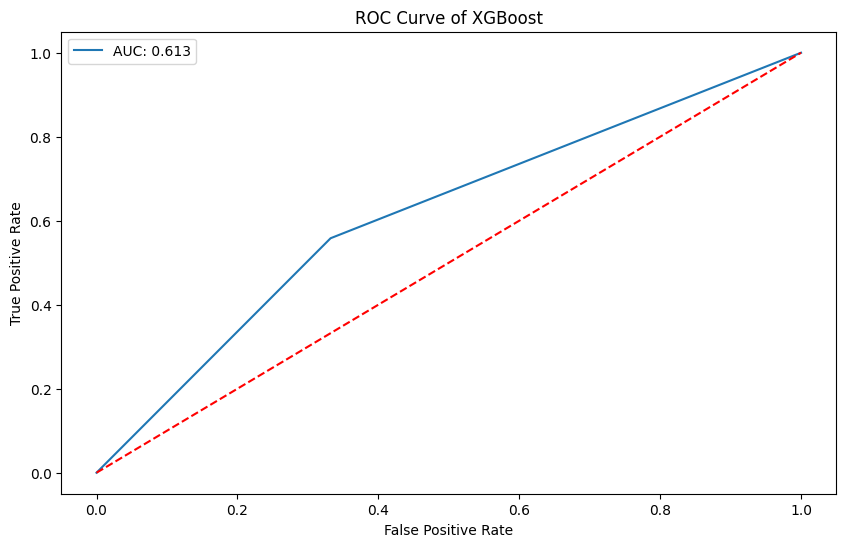

0.6130255253105474

In [ ]:
roc_auc_xgb = roc_auc_score(y_test, y_pred)

cm_xgb = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_xgb, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of XGBoost')
plt.show()

# plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_xgb:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of XGBoost')
plt.legend()
plt.show()
roc_auc_xgb

In [ ]:
%pip install optuna-integration

   ---------------------------------------- 0.0/93.4 kB ? eta -:--:--
   ---------------------------------------- 93.4/93.4 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# class MatthewsCorrelationCoefficient(keras.metrics.Metric):
#     def __init__(self, name='matthews_corrcoef', **kwargs):
#         super(MatthewsCorrelationCoefficient, self).__init__(name=name, **kwargs)
#         self.tp = self.add_weight(name='tp', initializer='zeros')
#         self.tn = self.add_weight(name='tn', initializer='zeros')
#         self.fp = self.add_weight(name='fp', initializer='zeros')
#         self.fn = self.add_weight(name='fn', initializer='zeros')

#     def update_state(self, y_true, y_pred, sample_weight=None):
#         y_pred = tf.round(tf.clip_by_value(y_pred, 0, 1))
#         y_true = tf.cast(y_true, tf.float32)

#         tp = tf.reduce_sum(tf.cast(y_true * y_pred, tf.float32))
#         tn = tf.reduce_sum(tf.cast((1 - y_true) * (1 - y_pred), tf.float32))
#         fp = tf.reduce_sum(tf.cast((1 - y_true) * y_pred, tf.float32))
#         fn = tf.reduce_sum(tf.cast(y_true * (1 - y_pred), tf.float32))

#         self.tp.assign_add(tp)
#         self.tn.assign_add(tn)
#         self.fp.assign_add(fp)
#         self.fn.assign_add(fn)

#     def result(self):
#         numerator = self.tp * self.tn - self.fp * self.fn
#         denominator = tf.sqrt((self.tp + self.fp) * (self.tp + self.fn) * (self.tn + self.fp) * (self.tn + self.fn))
#         return tf.math.divide_no_nan(numerator, denominator)

#     def reset_states(self):
#         for v in self.variables:
#             v.assign(0)

In [ ]:
def optimize_nn(trial):
    try:
        neurons_first_layer = trial.suggest_int('neurons_first_layer', 10, 500)
        neurons_second_layer = trial.suggest_int('neurons_second_layer', 10, 500)
        neurons_third_layer = trial.suggest_int('neurons_third_layer', 10, 500)
        add_fourth_layer = trial.suggest_categorical('add_fourth_layer', [True, False])
        if add_fourth_layer:
            neurons_fourth_layer = trial.suggest_int('neurons_fourth_layer', 10, 500)
        else:
            neurons_fourth_layer = 0
        add_fifth_layer = trial.suggest_categorical('add_fifth_layer', [True, False])
        if add_fifth_layer:
            neurons_fifth_layer = trial.suggest_int('neurons_fifth_layer', 10, 500)
        else:
            neurons_fifth_layer = 0

        early_stopping = keras.callbacks.EarlyStopping(monitor='val_auc', patience=10, restore_best_weights=True, mode='max')
        activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
        optimizer = trial.suggest_categorical('optimizer', ['adam', 'rmsprop', 'sgd'])
        loss = trial.suggest_categorical('loss', ['binary_crossentropy', 'hinge', 'squared_hinge', 'binary_focal_crossentropy'])
        batch_size = trial.suggest_int('batch_size', 32, 256)
        learning_rate = trial.suggest_float('learning_rate', 1e-7, 1e-2, log=True)
        dropout = trial.suggest_float('dropout', 0.1, 0.5)

        if optimizer == 'adam':
            opt = keras.optimizers.Adam(learning_rate=learning_rate)
        elif optimizer == 'rmsprop':
            opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
        else:
            opt = keras.optimizers.SGD(learning_rate=learning_rate)

        physical_devices = tf.config.list_physical_devices('GPU')
        if len(physical_devices) > 0:
            tf.config.experimental.set_memory_growth(physical_devices[0], True)

        # Crear el modelo
        nn = keras.models.Sequential()
        nn.add(keras.layers.InputLayer(shape=(X_train.shape[1],)))
        nn.add(keras.layers.Dropout(dropout))
        nn.add(keras.layers.Dense(neurons_first_layer, activation=activation))
        nn.add(keras.layers.Dropout(dropout))
        nn.add(keras.layers.Dense(neurons_second_layer, activation=activation))
        nn.add(keras.layers.Dropout(dropout))
        nn.add(keras.layers.Dense(neurons_third_layer, activation=activation))
        if add_fourth_layer:
            nn.add(keras.layers.Dropout(dropout))
            nn.add(keras.layers.Dense(neurons_fourth_layer, activation=activation))
        if add_fifth_layer:
            nn.add(keras.layers.Dropout(dropout))
            nn.add(keras.layers.Dense(neurons_fifth_layer, activation=activation))
        nn.add(keras.layers.Dense(1, activation='sigmoid'))

        # Compilar el modelo
        nn.compile(optimizer=opt, loss=loss, metrics=[keras.metrics.AUC(name='auc')])
        
        use_resampled = trial.suggest_categorical('use_resampled', [True, False])

        if use_resampled:
            nn.fit(X_train_resampled, y_train_resampled, validation_data=(X_val, y_val), batch_size=batch_size,
                   epochs=900, callbacks=[early_stopping], verbose=0)
        else:
            # Ajustar el modelo
            nn.fit(X_train, y_train, batch_size=batch_size, epochs=900, validation_data=(X_val, y_val),
               callbacks=[early_stopping], verbose=0)

        # Predecir y calcular las métricas en el conjunto de prueba
        y_pred = (nn.predict(X_test) > 0.5).astype('int32').reshape(-1)
        
        return roc_auc_score(y_test, y_pred)
    except Exception as e:
        logging.error(f"Optimization error: {e}")
        return float('-inf')

In [ ]:
optuna.logging.set_verbosity(optuna.logging.ERROR)

study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_nn.db', load_if_exists=True, study_name='Neural Network AUC')

study.optimize(optimize_nn, n_trials=1000, gc_after_trial=True)

best_nn = study.best_params

joblib.dump(study, 'optuna_study_nn.pkl')

best_nn

[I 2024-06-06 16:00:57,650] Using an existing study with name 'Neural Network MCC2' instead of creating a new one.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:01:12,443] Trial 887 finished with value: 0.18316393648120222 and parameters: {'neurons_first_layer': 347, 'neurons_second_layer': 398, 'neurons_third_layer': 140, 'add_fourth_layer': True, 'neurons_fourth_layer': 150, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 156, 'learning_rate': 1.8976100747308688e-05, 'dropout': 0.17827078648919065, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:01:32,838] Trial 888 finished with value: 0.20285683750986275 and parameters: {'neurons_first_layer': 314, 'neurons_second_layer': 373, 'neurons_third_layer': 155, 'add_fourth_layer': True, 'neurons_fourth_layer': 255, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 143, 'learning_rate': 0.003068579756925134, 'dropout': 0.34319263907135633, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:02:02,952] Trial 889 finished with value: 0.21288820886253929 and parameters: {'neurons_first_layer': 390, 'neurons_second_layer': 389, 'neurons_third_layer': 182, 'add_fourth_layer': True, 'neurons_fourth_layer': 171, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 127, 'learning_rate': 0.00814598366409923, 'dropout': 0.38239842835033255, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:02:23,397] Trial 890 finished with value: 0.25605958629345527 and parameters: {'neurons_first_layer': 337, 'neurons_second_layer': 408, 'neurons_third_layer': 165, 'add_fourth_layer': True, 'neurons_fourth_layer': 136, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 236, 'learning_rate': 0.004468501734047032, 'dropout': 0.1670964844121227, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:02:40,419] Trial 891 finished with value: 0.21939703565176338 and parameters: {'neurons_first_layer': 336, 'neurons_second_layer': 400, 'neurons_third_layer': 106, 'add_fourth_layer': True, 'neurons_fourth_layer': 134, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 238, 'learning_rate': 0.00665298122265845, 'dropout': 0.16854136610671544, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:02:57,592] Trial 892 finished with value: 0.22246122476907587 and parameters: {'neurons_first_layer': 338, 'neurons_second_layer': 384, 'neurons_third_layer': 195, 'add_fourth_layer': True, 'neurons_fourth_layer': 110, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 226, 'learning_rate': 0.005344475045905678, 'dropout': 0.1519812493054265, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:03:31,948] Trial 893 finished with value: 0.20337235096862988 and parameters: {'neurons_first_layer': 348, 'neurons_second_layer': 410, 'neurons_third_layer': 150, 'add_fourth_layer': True, 'neurons_fourth_layer': 120, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 220, 'learning_rate': 0.004510515419316025, 'dropout': 0.2067021456362026, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:03:49,223] Trial 894 finished with value: 0.09684027476398793 and parameters: {'neurons_first_layer': 328, 'neurons_second_layer': 337, 'neurons_third_layer': 175, 'add_fourth_layer': True, 'neurons_fourth_layer': 140, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'hinge', 'batch_size': 231, 'learning_rate': 0.006631797641723096, 'dropout': 0.1373091021118898, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:04:07,432] Trial 895 finished with value: 0.21569477758613723 and parameters: {'neurons_first_layer': 323, 'neurons_second_layer': 390, 'neurons_third_layer': 163, 'add_fourth_layer': True, 'neurons_fourth_layer': 129, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 219, 'learning_rate': 0.00978856026892258, 'dropout': 0.12416372993599528, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:04:25,984] Trial 896 finished with value: 0.23427435688287643 and parameters: {'neurons_first_layer': 358, 'neurons_second_layer': 400, 'neurons_third_layer': 129, 'add_fourth_layer': True, 'neurons_fourth_layer': 152, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 240, 'learning_rate': 0.003607384057895906, 'dropout': 0.11115798834676145, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:04:42,874] Trial 897 finished with value: 0.2226696611739091 and parameters: {'neurons_first_layer': 333, 'neurons_second_layer': 411, 'neurons_third_layer': 142, 'add_fourth_layer': True, 'neurons_fourth_layer': 148, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 249, 'learning_rate': 0.0024027842866462404, 'dropout': 0.1864192020745815, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:04:59,490] Trial 898 finished with value: 0.20478762658587096 and parameters: {'neurons_first_layer': 343, 'neurons_second_layer': 403, 'neurons_third_layer': 186, 'add_fourth_layer': True, 'neurons_fourth_layer': 138, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 241, 'learning_rate': 0.004766433568534393, 'dropout': 0.2167623615403173, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:05:18,323] Trial 899 finished with value: 0.23596807690948576 and parameters: {'neurons_first_layer': 318, 'neurons_second_layer': 377, 'neurons_third_layer': 216, 'add_fourth_layer': True, 'neurons_fourth_layer': 165, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 237, 'learning_rate': 0.0015702976300885757, 'dropout': 0.22896532227577937, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

[I 2024-06-06 16:05:33,863] Trial 900 finished with value: 0.0 and parameters: {'neurons_first_layer': 353, 'neurons_second_layer': 368, 'n

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:05:54,969] Trial 901 finished with value: 0.22693287335090817 and parameters: {'neurons_first_layer': 337, 'neurons_second_layer': 390, 'neurons_third_layer': 177, 'add_fourth_layer': True, 'neurons_fourth_layer': 153, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 234, 'learning_rate': 0.005828769374355892, 'dropout': 0.19495376942600984, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

[I 2024-06-06 16:06:11,563] Trial 902 finished with value: 0.0 and parameters: {'neurons_first_layer': 363, 'neurons_second_layer': 416, 'n

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:06:28,196] Trial 903 finished with value: 0.21158259198342874 and parameters: {'neurons_first_layer': 309, 'neurons_second_layer': 396, 'neurons_third_layer': 150, 'add_fourth_layer': True, 'neurons_fourth_layer': 183, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 250, 'learning_rate': 0.002113671298392808, 'dropout': 0.1528072100115772, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:06:46,636] Trial 904 finished with value: 0.25731405975085514 and parameters: {'neurons_first_layer': 328, 'neurons_second_layer': 407, 'neurons_third_layer': 134, 'add_fourth_layer': True, 'neurons_fourth_layer': 114, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 244, 'learning_rate': 0.008028351688022092, 'dropout': 0.1443839237572625, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:07:03,985] Trial 905 finished with value: 0.2267689233638681 and parameters: {'neurons_first_layer': 322, 'neurons_second_layer': 406, 'neurons_third_layer': 115, 'add_fourth_layer': True, 'neurons_fourth_layer': 110, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 243, 'learning_rate': 0.00861988064088237, 'dropout': 0.15863384346536352, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:07:21,774] Trial 906 finished with value: 0.22537468048843304 and parameters: {'neurons_first_layer': 325, 'neurons_second_layer': 415, 'neurons_third_layer': 121, 'add_fourth_layer': True, 'neurons_fourth_layer': 104, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 245, 'learning_rate': 0.009367098832036404, 'dropout': 0.14701288474166863, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:07:38,363] Trial 907 finished with value: 0.2117357146336543 and parameters: {'neurons_first_layer': 314, 'neurons_second_layer': 384, 'neurons_third_layer': 202, 'add_fourth_layer': True, 'neurons_fourth_layer': 94, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 246, 'learning_rate': 0.007358293289379994, 'dropout': 0.12946945596616416, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:07:56,235] Trial 908 finished with value: 0.20444534305852277 and parameters: {'neurons_first_layer': 331, 'neurons_second_layer': 402, 'neurons_third_layer': 191, 'add_fourth_layer': True, 'neurons_fourth_layer': 127, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 248, 'learning_rate': 0.009691762285492945, 'dropout': 0.11273265488017432, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:08:13,772] Trial 909 finished with value: 0.23186120767689145 and parameters: {'neurons_first_layer': 308, 'neurons_second_layer': 393, 'neurons_third_layer': 128, 'add_fourth_layer': True, 'neurons_fourth_layer': 114, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 253, 'learning_rate': 0.007711198797767967, 'dropout': 0.12087141262466625, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:08:31,190] Trial 910 finished with value: 0.19936488778563766 and parameters: {'neurons_first_layer': 319, 'neurons_second_layer': 410, 'neurons_third_layer': 136, 'add_fourth_layer': True, 'neurons_fourth_layer': 117, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 238, 'learning_rate': 0.0072367145262625405, 'dropout': 0.17456672263688158, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:08:48,660] Trial 911 finished with value: 0.20762872229235063 and parameters: {'neurons_first_layer': 327, 'neurons_second_layer': 417, 'neurons_third_layer': 180, 'add_fourth_layer': True, 'neurons_fourth_layer': 130, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 252, 'learning_rate': 0.006195963639026767, 'dropout': 0.24266428991114067, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:09:08,325] Trial 912 finished with value: 0.21599776628703699 and parameters: {'neurons_first_layer': 338, 'neurons_second_layer': 396, 'neurons_third_layer': 170, 'add_fourth_layer': True, 'neurons_fourth_layer': 135, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 242, 'learning_rate': 0.008363779436514574, 'dropout': 0.1846847604589162, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:09:24,498] Trial 913 finished with value: 0.21025438838360375 and parameters: {'neurons_first_layer': 306, 'neurons_second_layer': 380, 'neurons_third_layer': 113, 'add_fourth_layer': True, 'neurons_fourth_layer': 100, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 256, 'learning_rate': 0.00563594458714025, 'dropout': 0.10147548456997033, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:10:07,985] Trial 914 finished with value: 0.213162088072249 and parameters: {'neurons_first_layer': 330, 'neurons_second_layer': 404, 'neurons_third_layer': 157, 'add_fourth_layer': True, 'neurons_fourth_layer': 116, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 246, 'learning_rate': 8.372724930710677e-06, 'dropout': 0.20582668095036472, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:10:29,167] Trial 915 finished with value: 0.19034913392747735 and parameters: {'neurons_first_layer': 317, 'neurons_second_layer': 422, 'neurons_third_layer': 135, 'add_fourth_layer': True, 'neurons_fourth_layer': 121, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 249, 'learning_rate': 0.006837689020583961, 'dropout': 0.14511444141016105, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:10:46,153] Trial 916 finished with value: 0.19116248775270794 and parameters: {'neurons_first_layer': 339, 'neurons_second_layer': 388, 'neurons_third_layer': 187, 'add_fourth_layer': True, 'neurons_fourth_layer': 86, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'hinge', 'batch_size': 238, 'learning_rate': 0.005287218851437715, 'dropout': 0.13549720498845652, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:11:03,802] Trial 917 finished with value: 0.20467962167515646 and parameters: {'neurons_first_layer': 304, 'neurons_second_layer': 409, 'neurons_third_layer': 176, 'add_fourth_layer': True, 'neurons_fourth_layer': 145, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 247, 'learning_rate': 0.0032987721621583195, 'dropout': 0.21343996706951968, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:11:25,047] Trial 918 finished with value: 0.21244411991454365 and parameters: {'neurons_first_layer': 326, 'neurons_second_layer': 399, 'neurons_third_layer': 163, 'add_fourth_layer': True, 'neurons_fourth_layer': 134, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 234, 'learning_rate': 0.008009390116558032, 'dropout': 0.19389777005323272, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:11:44,328] Trial 919 finished with value: 0.22094217893462448 and parameters: {'neurons_first_layer': 316, 'neurons_second_layer': 419, 'neurons_third_layer': 144, 'add_fourth_layer': True, 'neurons_fourth_layer': 156, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 242, 'learning_rate': 0.0017862987361023093, 'dropout': 0.22497300268341291, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

[I 2024-06-06 16:12:01,256] Trial 920 finished with value: 0.0 and parameters: {'neurons_first_layer': 339, 'neurons_second_layer': 391, 'n

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:12:18,768] Trial 921 finished with value: 0.19987178839384534 and parameters: {'neurons_first_layer': 332, 'neurons_second_layer': 363, 'neurons_third_layer': 198, 'add_fourth_layer': True, 'neurons_fourth_layer': 125, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 230, 'learning_rate': 0.004725251617335405, 'dropout': 0.16179076100106582, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:12:39,958] Trial 922 finished with value: 0.2535755195866652 and parameters: {'neurons_first_layer': 345, 'neurons_second_layer': 378, 'neurons_third_layer': 154, 'add_fourth_layer': True, 'neurons_fourth_layer': 105, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 252, 'learning_rate': 0.002299769300961073, 'dropout': 0.2634346773710676, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:12:57,145] Trial 923 finished with value: 0.1977468300490103 and parameters: {'neurons_first_layer': 346, 'neurons_second_layer': 367, 'neurons_third_layer': 125, 'add_fourth_layer': True, 'neurons_fourth_layer': 87, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 251, 'learning_rate': 0.0015075949975380245, 'dropout': 0.2874271975310243, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


[I 2024-06-06 16:13:16,543] Trial 924 finished with value: 0.21700866665429563 and parameters: {'neurons_first_layer': 344, 'neurons_second_layer': 374, 'neurons_third_layer': 104, 'add_fourth_layer': True, 'neurons_fourth_layer': 83, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 256, 'learning_rate': 0.0021114275348828584, 'dropout': 0.11152065815590145, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:13:40,148] Trial 925 finished with value: 0.03481238537830724 and parameters: {'neurons_first_layer': 350, 'neurons_second_layer': 380, 'neurons_third_layer': 135, 'add_fourth_layer': True, 'neurons_fourth_layer': 115, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'squared_hinge', 'batch_size': 251, 'learning_rate': 0.0016436815610989218, 'dropout': 0.26117210728542267, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:14:08,356] Trial 926 finished with value: 0.239889174762712 and parameters: {'neurons_first_layer': 334, 'neurons_second_layer': 367, 'neurons_third_layer': 150, 'add_fourth_layer': True, 'neurons_fourth_layer': 100, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 247, 'learning_rate': 0.0011446155452651226, 'dropout': 0.15429316442466579, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:14:26,268] Trial 927 finished with value: 0.23060747223961248 and parameters: {'neurons_first_layer': 345, 'neurons_second_layer': 378, 'neurons_third_layer': 168, 'add_fourth_layer': True, 'neurons_fourth_layer': 99, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 242, 'learning_rate': 0.0024616515429396295, 'dropout': 0.3043826171583433, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:14:47,346] Trial 928 finished with value: 0.22373537155162437 and parameters: {'neurons_first_layer': 358, 'neurons_second_layer': 353, 'neurons_third_layer': 182, 'add_fourth_layer': True, 'neurons_fourth_layer': 101, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 254, 'learning_rate': 0.0022037697460319636, 'dropout': 0.3262052857853523, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:15:05,102] Trial 929 finished with value: 0.20622395691885687 and parameters: {'neurons_first_layer': 321, 'neurons_second_layer': 385, 'neurons_third_layer': 144, 'add_fourth_layer': True, 'neurons_fourth_layer': 93, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 245, 'learning_rate': 0.001267473848828776, 'dropout': 0.13695785075959574, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:15:23,093] Trial 930 finished with value: 0.240684957740961 and parameters: {'neurons_first_layer': 333, 'neurons_second_layer': 360, 'neurons_third_layer': 210, 'add_fourth_layer': True, 'neurons_fourth_layer': 82, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 249, 'learning_rate': 0.0017916933829580407, 'dropout': 0.12957360798978787, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:15:43,215] Trial 931 finished with value: 0.23229168896222935 and parameters: {'neurons_first_layer': 342, 'neurons_second_layer': 392, 'neurons_third_layer': 153, 'add_fourth_layer': True, 'neurons_fourth_layer': 102, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 252, 'learning_rate': 0.0025267233849321433, 'dropout': 0.27157175936538164, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-06-06 16:16:06,873] Trial 932 finished with value: 0.12711502095624405 and parameters: {'neurons_first_layer': 323, 'neurons_second_layer': 376, 'neurons_third_layer': 192, 'add_fourth_layer': True, 'neurons_fourth_layer': 106, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 236, 'learning_rate': 4.156234816838198e-07, 'dropout': 0.12016851206734248, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:16:25,964] Trial 933 finished with value: 0.22663958495693828 and parameters: {'neurons_first_layer': 350, 'neurons_second_layer': 402, 'neurons_third_layer': 172, 'add_fourth_layer': True, 'neurons_fourth_layer': 163, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 245, 'learning_rate': 0.0027555910919510916, 'dropout': 0.18178547316445065, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


[I 2024-06-06 16:16:48,690] Trial 934 finished with value: 0.24414619097107934 and parameters: {'neurons_first_layer': 381, 'neurons_second_layer': 382, 'neurons_third_layer': 97, 'add_fourth_layer': True, 'neurons_fourth_layer': 307, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 241, 'learning_rate': 0.006312662637359552, 'dropout': 0.24995713427122607, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:17:07,096] Trial 935 finished with value: 0.1522475501184789 and parameters: {'neurons_first_layer': 311, 'neurons_second_layer': 395, 'neurons_third_layer': 130, 'add_fourth_layer': True, 'neurons_fourth_layer': 269, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 253, 'learning_rate': 0.0034690963055136158, 'dropout': 0.16399859397526656, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:17:26,561] Trial 936 finished with value: 0.25259052009916294 and parameters: {'neurons_first_layer': 331, 'neurons_second_layer': 370, 'neurons_third_layer': 164, 'add_fourth_layer': True, 'neurons_fourth_layer': 110, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 250, 'learning_rate': 0.004332219525427424, 'dropout': 0.1986358679316731, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:17:45,034] Trial 937 finished with value: 0.22116411001571853 and parameters: {'neurons_first_layer': 332, 'neurons_second_layer': 367, 'neurons_third_layer': 157, 'add_fourth_layer': True, 'neurons_fourth_layer': 110, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 248, 'learning_rate': 0.005877987358917083, 'dropout': 0.19932724202904956, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:18:03,052] Trial 938 finished with value: 0.20744285556190248 and parameters: {'neurons_first_layer': 327, 'neurons_second_layer': 365, 'neurons_third_layer': 143, 'add_fourth_layer': True, 'neurons_fourth_layer': 134, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 251, 'learning_rate': 0.004952137142828193, 'dropout': 0.2146702303041383, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

[I 2024-06-06 16:18:19,442] Trial 939 finished with value: 0.0 and parameters: {'neurons_first_layer': 338, 'neurons_second_layer': 337, 'n

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:18:35,761] Trial 940 finished with value: 0.2292650258978388 and parameters: {'neurons_first_layer': 322, 'neurons_second_layer': 20, 'neurons_third_layer': 152, 'add_fourth_layer': True, 'neurons_fourth_layer': 319, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 255, 'learning_rate': 0.0045754342075476585, 'dropout': 0.14483698355898106, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:18:54,724] Trial 941 finished with value: 0.14437534812688238 and parameters: {'neurons_first_layer': 348, 'neurons_second_layer': 353, 'neurons_third_layer': 120, 'add_fourth_layer': True, 'neurons_fourth_layer': 121, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'hinge', 'batch_size': 256, 'learning_rate': 0.006149318421680569, 'dropout': 0.18948326175670352, 'use_resampled': True}. Best is trial 665 with value: 0.27130742317069656.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:19:13,861] Trial 942 finished with value: 0.27469060288330677 and parameters: {'neurons_first_layer': 336, 'neurons_second_layer': 354, 'neurons_third_layer': 165, 'add_fourth_layer': True, 'neurons_fourth_layer': 174, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 247, 'learning_rate': 0.004005213227773255, 'dropout': 0.17742865458703722, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:19:32,603] Trial 943 finished with value: 0.2135055160645612 and parameters: {'neurons_first_layer': 325, 'neurons_second_layer': 356, 'neurons_third_layer': 166, 'add_fourth_layer': True, 'neurons_fourth_layer': 173, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 246, 'learning_rate': 0.0039303201203464986, 'dropout': 0.1757923264962761, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:19:52,562] Trial 944 finished with value: 0.22367719988985546 and parameters: {'neurons_first_layer': 315, 'neurons_second_layer': 326, 'neurons_third_layer': 161, 'add_fourth_layer': True, 'neurons_fourth_layer': 188, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 242, 'learning_rate': 0.003811673770668758, 'dropout': 0.20296461756193113, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:20:11,682] Trial 945 finished with value: 0.23451671884871783 and parameters: {'neurons_first_layer': 334, 'neurons_second_layer': 352, 'neurons_third_layer': 172, 'add_fourth_layer': True, 'neurons_fourth_layer': 174, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 250, 'learning_rate': 0.003224424967004457, 'dropout': 0.15566667663716666, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:20:29,733] Trial 946 finished with value: 0.20500033090768255 and parameters: {'neurons_first_layer': 331, 'neurons_second_layer': 350, 'neurons_third_layer': 159, 'add_fourth_layer': True, 'neurons_fourth_layer': 180, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 246, 'learning_rate': 0.004361946060116858, 'dropout': 0.1671394301021064, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:20:52,191] Trial 947 finished with value: 0.21688308751094687 and parameters: {'neurons_first_layer': 360, 'neurons_second_layer': 350, 'neurons_third_layer': 166, 'add_fourth_layer': True, 'neurons_fourth_layer': 161, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 241, 'learning_rate': 0.0030266441592625586, 'dropout': 0.23745691221747095, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:21:10,384] Trial 948 finished with value: 0.216915398467406 and parameters: {'neurons_first_layer': 318, 'neurons_second_layer': 369, 'neurons_third_layer': 152, 'add_fourth_layer': True, 'neurons_fourth_layer': 190, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 250, 'learning_rate': 0.0040117954146321405, 'dropout': 0.18214721509885134, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-06-06 16:21:29,035] Trial 949 finished with value: 0.20009352731826308 and parameters: {'neurons_first_layer': 341, 'neurons_second_layer': 356, 'neurons_third_layer': 175, 'add_fourth_layer': True, 'neurons_fourth_layer': 166, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 251, 'learning_rate': 0.005007874565638319, 'dropout': 0.13973659594866267, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

[I 2024-06-06 16:21:48,041] Trial 950 finished with value: 0.0 and parameters: {'neurons_first_layer': 484, 'neurons_second_layer': 345, 'n

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:22:09,627] Trial 951 finished with value: 0.25137929421620836 and parameters: {'neurons_first_layer': 308, 'neurons_second_layer': 365, 'neurons_third_layer': 177, 'add_fourth_layer': True, 'neurons_fourth_layer': 295, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 245, 'learning_rate': 0.0036872528464197037, 'dropout': 0.1915611278878683, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:22:30,214] Trial 952 finished with value: 0.21800766550030823 and parameters: {'neurons_first_layer': 327, 'neurons_second_layer': 369, 'neurons_third_layer': 155, 'add_fourth_layer': True, 'neurons_fourth_layer': 147, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 256, 'learning_rate': 0.004662892351662806, 'dropout': 0.21025603124826805, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


[I 2024-06-06 16:22:48,801] Trial 953 finished with value: 0.21611580130550137 and parameters: {'neurons_first_layer': 408, 'neurons_second_layer': 369, 'neurons_third_layer': 165, 'add_fourth_layer': True, 'neurons_fourth_layer': 182, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 236, 'learning_rate': 0.0023147667711156065, 'dropout': 0.10731600809184576, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:23:13,395] Trial 954 finished with value: 0.25371838242196304 and parameters: {'neurons_first_layer': 354, 'neurons_second_layer': 362, 'neurons_third_layer': 145, 'add_fourth_layer': True, 'neurons_fourth_layer': 157, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 241, 'learning_rate': 0.0032297668742523, 'dropout': 0.17274049695878393, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:23:32,214] Trial 955 finished with value: 0.19936357984313036 and parameters: {'neurons_first_layer': 374, 'neurons_second_layer': 358, 'neurons_third_layer': 146, 'add_fourth_layer': True, 'neurons_fourth_layer': 165, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 235, 'learning_rate': 0.0022650769039834913, 'dropout': 0.1481088895680556, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:23:56,119] Trial 956 finished with value: 0.25300999313506556 and parameters: {'neurons_first_layer': 364, 'neurons_second_layer': 346, 'neurons_third_layer': 143, 'add_fourth_layer': True, 'neurons_fourth_layer': 157, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 235, 'learning_rate': 0.002847255883378631, 'dropout': 0.11552961737137951, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:24:15,066] Trial 957 finished with value: 0.21745925846692044 and parameters: {'neurons_first_layer': 379, 'neurons_second_layer': 326, 'neurons_third_layer': 137, 'add_fourth_layer': True, 'neurons_fourth_layer': 175, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 231, 'learning_rate': 0.0018489682872703057, 'dropout': 0.12006456396943428, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:24:34,929] Trial 958 finished with value: 0.2544545997008409 and parameters: {'neurons_first_layer': 356, 'neurons_second_layer': 354, 'neurons_third_layer': 139, 'add_fourth_layer': True, 'neurons_fourth_layer': 158, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 238, 'learning_rate': 0.0019222633851033303, 'dropout': 0.11295490623331385, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:24:58,471] Trial 959 finished with value: 0.17196930872836091 and parameters: {'neurons_first_layer': 369, 'neurons_second_layer': 313, 'neurons_third_layer': 136, 'add_fourth_layer': True, 'neurons_fourth_layer': 477, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 239, 'learning_rate': 0.0013596363893581484, 'dropout': 0.10157302916527887, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:25:17,594] Trial 960 finished with value: 0.19635559004038913 and parameters: {'neurons_first_layer': 363, 'neurons_second_layer': 348, 'neurons_third_layer': 136, 'add_fourth_layer': True, 'neurons_fourth_layer': 172, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 233, 'learning_rate': 0.002138606330734813, 'dropout': 0.15716924044109437, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

[I 2024-06-06 16:25:34,930] Trial 961 finished with value: 0.0 and parameters: {'neurons_first_layer': 353, 'neurons_second_layer': 340, 'n

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:25:55,293] Trial 962 finished with value: 0.22274180865223897 and parameters: {'neurons_first_layer': 363, 'neurons_second_layer': 364, 'neurons_third_layer': 132, 'add_fourth_layer': True, 'neurons_fourth_layer': 155, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 238, 'learning_rate': 0.0013249573435531344, 'dropout': 0.1707820990694906, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:26:14,855] Trial 963 finished with value: 0.2456075650298718 and parameters: {'neurons_first_layer': 360, 'neurons_second_layer': 353, 'neurons_third_layer': 146, 'add_fourth_layer': True, 'neurons_fourth_layer': 176, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 239, 'learning_rate': 0.002170555436189059, 'dropout': 0.12519209734223277, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:26:34,769] Trial 964 finished with value: 0.22256898600067235 and parameters: {'neurons_first_layer': 373, 'neurons_second_layer': 336, 'neurons_third_layer': 145, 'add_fourth_layer': True, 'neurons_fourth_layer': 194, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 226, 'learning_rate': 0.0016018312664990814, 'dropout': 0.14643343939167544, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-06-06 16:27:04,203] Trial 965 finished with value: 0.1891028051836342 and parameters: {'neurons_first_layer': 352, 'neurons_second_layer': 368, 'neurons_third_layer': 494, 'add_fourth_layer': True, 'neurons_fourth_layer': 165, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'hinge', 'batch_size': 243, 'learning_rate': 0.0018424879732615643, 'dropout': 0.14099072278652858, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:27:24,160] Trial 966 finished with value: 0.24419697110245045 and parameters: {'neurons_first_layer': 357, 'neurons_second_layer': 343, 'neurons_third_layer': 152, 'add_fourth_layer': True, 'neurons_fourth_layer': 155, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 241, 'learning_rate': 0.0011269051353440817, 'dropout': 0.11112330719605577, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:27:43,645] Trial 967 finished with value: 0.2150482654028155 and parameters: {'neurons_first_layer': 342, 'neurons_second_layer': 359, 'neurons_third_layer': 133, 'add_fourth_layer': True, 'neurons_fourth_layer': 181, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 242, 'learning_rate': 0.002660938649562672, 'dropout': 0.16620006978738724, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:28:03,468] Trial 968 finished with value: 0.23106386651958877 and parameters: {'neurons_first_layer': 389, 'neurons_second_layer': 357, 'neurons_third_layer': 150, 'add_fourth_layer': True, 'neurons_fourth_layer': 149, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 234, 'learning_rate': 0.0017910446595198106, 'dropout': 0.15669061205918794, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:28:26,644] Trial 969 finished with value: 0.2220569310515353 and parameters: {'neurons_first_layer': 354, 'neurons_second_layer': 343, 'neurons_third_layer': 140, 'add_fourth_layer': True, 'neurons_fourth_layer': 166, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 235, 'learning_rate': 0.002547968387173881, 'dropout': 0.1339669669118547, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


[I 2024-06-06 16:28:48,739] Trial 970 finished with value: 0.21316729397636072 and parameters: {'neurons_first_layer': 367, 'neurons_second_layer': 335, 'neurons_third_layer': 153, 'add_fourth_layer': True, 'neurons_fourth_layer': 149, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 240, 'learning_rate': 0.0019332402276606426, 'dropout': 0.17579483139736227, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:29:08,597] Trial 971 finished with value: 0.21762922788592134 and parameters: {'neurons_first_layer': 349, 'neurons_second_layer': 332, 'neurons_third_layer': 123, 'add_fourth_layer': True, 'neurons_fourth_layer': 191, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 228, 'learning_rate': 0.003110571565127235, 'dropout': 0.12903561255783474, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


[I 2024-06-06 16:29:29,463] Trial 972 finished with value: 0.23345796736420407 and parameters: {'neurons_first_layer': 372, 'neurons_second_layer': 356, 'neurons_third_layer': 147, 'add_fourth_layer': True, 'neurons_fourth_layer': 156, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 221, 'learning_rate': 0.002494666713605691, 'dropout': 0.11890781724521975, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

[I 2024-06-06 16:29:48,352] Trial 973 finished with value: 0.0 and parameters: {'neurons_first_layer': 348, 'neurons_second_layer': 359, 'n

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-06-06 16:30:11,974] Trial 974 finished with value: 0.2554667245946921 and parameters: {'neurons_first_layer': 357, 'neurons_second_layer': 374, 'neurons_third_layer': 397, 'add_fourth_layer': True, 'neurons_fourth_layer': 169, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 236, 'learning_rate': 0.0014867240972549851, 'dropout': 0.18297528186569095, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:30:30,969] Trial 975 finished with value: 0.2088605949923116 and parameters: {'neurons_first_layer': 374, 'neurons_second_layer': 375, 'neurons_third_layer': 298, 'add_fourth_layer': True, 'neurons_fourth_layer': 176, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 232, 'learning_rate': 0.0024523658284145945, 'dropout': 0.1869181432626216, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:30:51,003] Trial 976 finished with value: 0.2234183669392532 and parameters: {'neurons_first_layer': 364, 'neurons_second_layer': 356, 'neurons_third_layer': 360, 'add_fourth_layer': True, 'neurons_fourth_layer': 168, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 239, 'learning_rate': 0.0015103366833027177, 'dropout': 0.10024899838204164, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-06-06 16:31:11,695] Trial 977 finished with value: 0.23499095298282582 and parameters: {'neurons_first_layer': 357, 'neurons_second_layer': 343, 'neurons_third_layer': 339, 'add_fourth_layer': True, 'neurons_fourth_layer': 182, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 233, 'learning_rate': 0.003251963051075506, 'dropout': 0.16542198133344194, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

[I 2024-06-06 16:31:29,396] Trial 978 finished with value: 0.0 and parameters: {'neurons_first_layer': 375, 'neurons_second_layer': 363, 'n

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:31:57,113] Trial 979 finished with value: 0.16642058595555462 and parameters: {'neurons_first_layer': 357, 'neurons_second_layer': 377, 'neurons_third_layer': 151, 'add_fourth_layer': True, 'neurons_fourth_layer': 193, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 234, 'learning_rate': 0.0026636541131637975, 'dropout': 0.15944373288369532, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


[I 2024-06-06 16:32:16,308] Trial 980 finished with value: 0.2285123991505477 and parameters: {'neurons_first_layer': 303, 'neurons_second_layer': 321, 'neurons_third_layer': 397, 'add_fourth_layer': True, 'neurons_fourth_layer': 168, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 236, 'learning_rate': 0.00349567642159885, 'dropout': 0.20444102707848666, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-06-06 16:32:37,538] Trial 981 finished with value: 0.22841417893459057 and parameters: {'neurons_first_layer': 384, 'neurons_second_layer': 375, 'neurons_third_layer': 435, 'add_fourth_layer': True, 'neurons_fourth_layer': 158, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 243, 'learning_rate': 0.0019956241583428064, 'dropout': 0.14012711559701255, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


[I 2024-06-06 16:32:58,827] Trial 982 finished with value: 0.22868911437833567 and parameters: {'neurons_first_layer': 313, 'neurons_second_layer': 347, 'neurons_third_layer': 318, 'add_fourth_layer': True, 'neurons_fourth_layer': 187, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 244, 'learning_rate': 0.003026281245024721, 'dropout': 0.18197482525665631, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:33:17,696] Trial 983 finished with value: 0.20860046494647 and parameters: {'neurons_first_layer': 340, 'neurons_second_layer': 361, 'neurons_third_layer': 142, 'add_fourth_layer': True, 'neurons_fourth_layer': 284, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 237, 'learning_rate': 0.005514263620004073, 'dropout': 0.15091787217484437, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:33:40,234] Trial 984 finished with value: 0.23110603589998369 and parameters: {'neurons_first_layer': 356, 'neurons_second_layer': 375, 'neurons_third_layer': 157, 'add_fourth_layer': True, 'neurons_fourth_layer': 161, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 224, 'learning_rate': 0.0077183123673220345, 'dropout': 0.19270250479618783, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


[I 2024-06-06 16:34:00,053] Trial 985 finished with value: 0.2503280725550915 and parameters: {'neurons_first_layer': 306, 'neurons_second_layer': 367, 'neurons_third_layer': 259, 'add_fourth_layer': True, 'neurons_fourth_layer': 147, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 230, 'learning_rate': 0.0036783261847673733, 'dropout': 0.12321588212762719, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:34:19,207] Trial 986 finished with value: 0.21081345773317325 and parameters: {'neurons_first_layer': 348, 'neurons_second_layer': 378, 'neurons_third_layer': 126, 'add_fourth_layer': True, 'neurons_fourth_layer': 177, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 240, 'learning_rate': 0.0022436535512945764, 'dropout': 0.14382190530310301, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


[I 2024-06-06 16:34:41,024] Trial 987 finished with value: 0.15630530040713128 and parameters: {'neurons_first_layer': 318, 'neurons_second_layer': 350, 'neurons_third_layer': 156, 'add_fourth_layer': True, 'neurons_fourth_layer': 201, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'hinge', 'batch_size': 243, 'learning_rate': 0.002848637569511313, 'dropout': 0.17145637763083146, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:35:01,149] Trial 988 finished with value: 0.2214608940545809 and parameters: {'neurons_first_layer': 367, 'neurons_second_layer': 369, 'neurons_third_layer': 142, 'add_fourth_layer': True, 'neurons_fourth_layer': 161, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 217, 'learning_rate': 0.0051570501916694544, 'dropout': 0.10748454422284667, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:35:24,234] Trial 989 finished with value: 0.2246458337903732 and parameters: {'neurons_first_layer': 300, 'neurons_second_layer': 359, 'neurons_third_layer': 134, 'add_fourth_layer': True, 'neurons_fourth_layer': 149, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 246, 'learning_rate': 0.00172791351609254, 'dropout': 0.13441586164301872, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:35:45,590] Trial 990 finished with value: 0.20250216459438372 and parameters: {'neurons_first_layer': 337, 'neurons_second_layer': 380, 'neurons_third_layer': 155, 'add_fourth_layer': True, 'neurons_fourth_layer': 170, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 229, 'learning_rate': 0.001032948090074521, 'dropout': 0.22309733283514632, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-06-06 16:36:12,627] Trial 991 finished with value: 0.259486921152176 and parameters: {'neurons_first_layer': 353, 'neurons_second_layer': 383, 'neurons_third_layer': 466, 'add_fourth_layer': True, 'neurons_fourth_layer': 187, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 237, 'learning_rate': 0.0041396178805021295, 'dropout': 0.16037377771226238, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-06-06 16:36:32,353] Trial 992 finished with value: 0.2243062425654421 and parameters: {'neurons_first_layer': 366, 'neurons_second_layer': 331, 'neurons_third_layer': 473, 'add_fourth_layer': True, 'neurons_fourth_layer': 189, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 236, 'learning_rate': 0.005796411013381946, 'dropout': 0.16096309822929722, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-06-06 16:36:52,189] Trial 993 finished with value: 0.18635855464177759 and parameters: {'neurons_first_layer': 356, 'neurons_second_layer': 363, 'neurons_third_layer': 468, 'add_fourth_layer': True, 'neurons_fourth_layer': 195, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 230, 'learning_rate': 0.004461098292043748, 'dropout': 0.116548015102279, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-06 16:37:15,100] Trial 994 finished with value: 0.21073929756324536 and parameters: {'neurons_first_layer': 154, 'neurons_second_layer': 381, 'neurons_third_layer': 118, 'add_fourth_layer': True, 'neurons_fourth_layer': 177, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 237, 'learning_rate': 0.007978219058387158, 'dropout': 0.15216167259235225, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-06-06 16:37:37,797] Trial 995 finished with value: 0.2282218320603194 and parameters: {'neurons_first_layer': 378, 'neurons_second_layer': 387, 'neurons_third_layer': 404, 'add_fourth_layer': True, 'neurons_fourth_layer': 199, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 232, 'learning_rate': 0.004198012959782894, 'dropout': 0.12814726377737856, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-06-06 16:37:58,258] Trial 996 finished with value: 0.2453481971130411 and parameters: {'neurons_first_layer': 383, 'neurons_second_layer': 340, 'neurons_third_layer': 489, 'add_fourth_layer': True, 'neurons_fourth_layer': 187, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 235, 'learning_rate': 0.006500643673535567, 'dropout': 0.18763743239461894, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

[I 2024-06-06 16:38:16,506] Trial 997 finished with value: 0.0 and parameters: {'neurons_first_layer': 358, 'neurons_second_layer': 371, 'n

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-06-06 16:38:36,510] Trial 998 finished with value: 0.19618458828417043 and parameters: {'neurons_first_layer': 370, 'neurons_second_layer': 385, 'neurons_third_layer': 481, 'add_fourth_layer': True, 'neurons_fourth_layer': 173, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 232, 'learning_rate': 0.0038317718065897484, 'dropout': 0.14319204761898144, 'use_resampled': True}. Best is trial 942 with value: 0.27469060288330677.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

[I 2024-06-06 16:38:54,879] Trial 999 finished with value: 0.0 and parameters: {'neurons_first_layer': 298, 'neurons_second_layer': 373, 'n

In [ ]:
study.best_value

0.2424429235588128

In [ ]:
study = optuna.load_study(study_name='Neural Network AUC', storage='sqlite:///optuna_study_nn.db')

best_nn = study.best_params

best_nn

{'neurons_first_layer': 336,
 'neurons_second_layer': 354,
 'neurons_third_layer': 165,
 'add_fourth_layer': True,
 'neurons_fourth_layer': 174,
 'add_fifth_layer': False,
 'activation': 'relu',
 'optimizer': 'adam',
 'loss': 'binary_crossentropy',
 'batch_size': 247,
 'learning_rate': 0.004005213227773255,
 'dropout': 0.17742865458703722,
 'use_resampled': True}

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

[W 2024-06-06 16:51:51,196] Trial 5 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 16:51:51,197] Trial 7 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 16:51:51,197] Trial 8 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 16:51:51,198] Trial 10 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 16:51:51,198] Trial 11 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 16:51:51,198] Trial 13 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 16:51:51,199] Trial 14 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 16:51:51,199] Trial 16 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 16:51:51,200] Trial 18 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 16:51:51,200] Tri

In [ ]:
optuna.visualization.plot_slice(study)

[W 2024-06-06 16:52:08,545] Trial 5 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 16:52:08,545] Trial 7 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 16:52:08,545] Trial 8 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 16:52:08,546] Trial 10 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 16:52:08,546] Trial 11 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 16:52:08,546] Trial 13 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 16:52:08,546] Trial 14 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 16:52:08,547] Trial 16 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 16:52:08,547] Trial 18 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-06 16:52:08,547] Tri

In [ ]:
best_nn = study.best_params
use_resampled = best_nn.pop('use_resampled')
dropout = best_nn.pop('dropout') if 'dropout' in best_nn else 0.2
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(shape=(X_train.shape[1],)))
model.add(keras.layers.Dropout(dropout))
model.add(keras.layers.Dense(best_nn['neurons_first_layer'], activation=best_nn['activation']))
model.add(keras.layers.Dropout(dropout))
model.add(keras.layers.Dense(best_nn['neurons_second_layer'], activation=best_nn['activation']))
model.add(keras.layers.Dropout(dropout))
model.add(keras.layers.Dense(best_nn['neurons_third_layer'], activation=best_nn['activation']))
if best_nn['add_fourth_layer']:
    model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(best_nn['neurons_fourth_layer'], activation=best_nn['activation']))
if best_nn['add_fifth_layer']:
    model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(best_nn['neurons_fifth_layer'], activation=best_nn['activation']))
model.add(keras.layers.Dense(1, activation='sigmoid'))

early_stopping = keras.callbacks.EarlyStopping(monitor='val_matthews_corrcoef', patience=10, restore_best_weights=True, mode='max')
opt = keras.optimizers.Adam(learning_rate=best_nn['learning_rate'])

model.compile(optimizer=opt, loss=best_nn['loss'], metrics=[keras.metrics.AUC(name='auc')])
if use_resampled:
    model.fit(X_train_resampled, y_train_resampled, validation_data=(X_val, y_val), batch_size=best_nn['batch_size'], epochs=900,
              callbacks=[early_stopping], verbose=1)
else:
    model.fit(X_train, y_train, batch_size=best_nn['batch_size'], epochs=900, validation_data=(X_val, y_val),
          callbacks=[early_stopping], verbose=1)

y_pred = (model.predict(X_test) >= 0.5).astype('int32').reshape(-1)
print(classification_report(y_test, y_pred))

Epoch 1/900
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6691 - matthews_corrcoef: 0.0078 - val_loss: 0.7081 - val_matthews_corrcoef: -0.0015
Epoch 2/900
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6534 - matthews_corrcoef: -0.0023 - val_loss: 0.6808 - val_matthews_corrcoef: -7.4065e-04
Epoch 3/900
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6502 - matthews_corrcoef: 0.0014 - val_loss: 0.6452 - val_matthews_corrcoef: 4.5617e-04
Epoch 4/900
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6419 - matthews_corrcoef: 2.5002e-04 - val_loss: 0.6609 - val_matthews_corrcoef: 5.1345e-05
Epoch 5/900
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6416 - matthews_corrcoef: 6.8114e-04 - val_loss: 0.6445 - val_matthews_corrcoef: 0.0032
Epoch 6/900
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6432 - matthews_corrcoef: -7.5829e-04 - val_loss: 0.6489 - val_matthews_corrcoef: 4.0009e-04
Epoch 7/900
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6341 - matthews_corrcoef: 2.5238e-04 

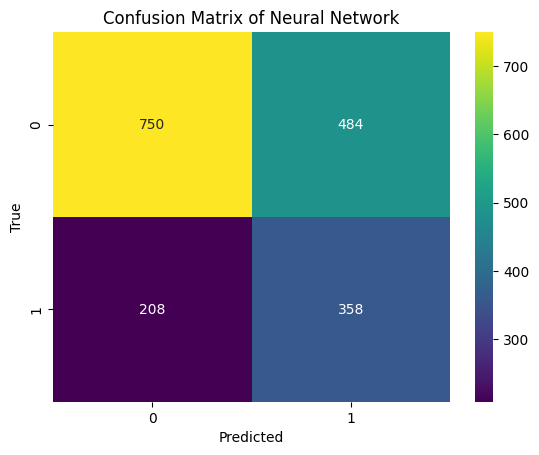

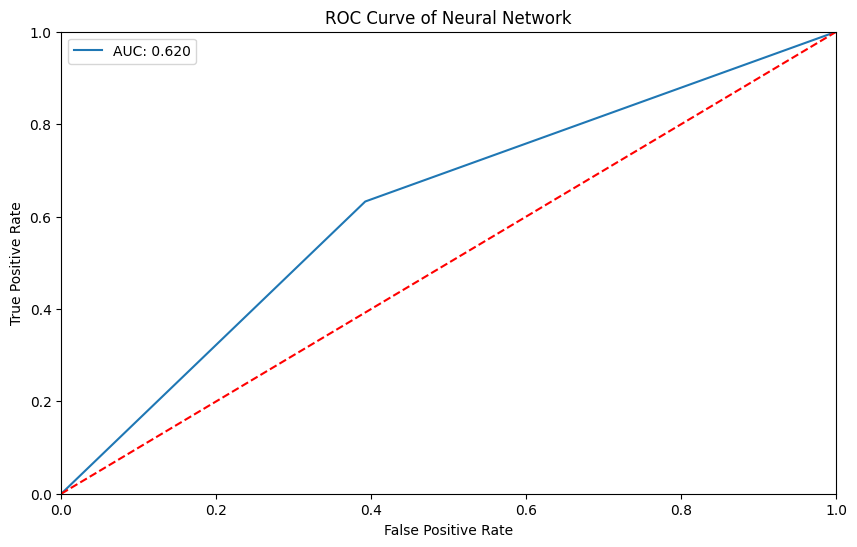

In [ ]:
roc_auc_nn = roc_auc_score(y_test, y_pred)

cm_nn = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_nn, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Neural Network')
plt.show()

roc_auc_nn

# plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_nn:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Neural Network')
plt.legend()
plt.show()